<img src='../sys/Title.png'>


<p style="text-align: right;"><font face="Microsoft JhengHei"> 精算二部 決策支援系統科 黃喬敬(#2656) 謝承翰(#2654)</font> </p>







<p style="text-align: center;"> <font size=100% face="Microsoft JhengHei">Regression 回歸    </font>  </p>






<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>

<a id="INPUT"></a>


------

# 輸入資料



## <font color=DARKRED>設定輸入資料、目標欄位</font>



1.  
    ```python
    TrainDataFile = 'Train'
 ```
    引號中的 **Train**  改成自己上傳的檔案位置及名稱，以 ClaimRiskTrain 為例，修改如下
    ```python
    TrainDataFile = 'ClaimRiskTrain'
    ```
    
2. 
    ```python
    TestDataFile = 'Test'
    ```
    引號中的 **Test**  改成自己上傳的檔案位置及名稱，以 ClaimRiskTest17 為例，修改如下
    ```python
    TestDataFile = 'ClaimRiskTest17'
    ```
3. 
    ```python
    TargetColumn = 'Y'

    ```
    引號中的 **Y**  改成自己上傳的檔案中，要學習預測的目標欄位的名稱，以 ans 為例，修改如下
    ```python
    TargetColumn = 'ans'
    ```
4. 
    ```python
    DropColumns = ''

    ```
    引號中 填入自己上傳的檔案中，不需要學習的欄位名稱，多數欄位以逗號分隔，比如 ID 或是 電話 等等，以 '被保人ID', '理賠指數_2016' 為例，修改如下
    ```python
    DropColumns = '被保人ID', '理賠指數_2016'
    ```
5. 
    ```python
    OutputAnswer = 'finaldata'

    ```
    引號中的 **finaldata**  改成預定產出各模型預測結果的檔名，也可以不必修改

<img src='../sys/NeedExe.png' style="float:left;width:27%;"><img src='../sys/NeedModi.png' style="float:middle;width:27.2%;">


In [82]:
TrainDataFile = 'blogData_train.csv'
TestDataFile  = 'blogData_test.csv'
TargetColumn  = 'col_281'
DropColumns   = ''
OutputAnswer  = 'finaldata'
OtherPredict = ''#'LightGBM', 'RidgeClassifier','SVM','K-NN'

## 介面說明

In [83]:
'左方帶有 In [ ]  表示這是程式碼的區塊，在區塊內的程式碼可以執行，游標移至區塊內並按下 Shift + Enter ，即可執行此區塊內的程式'
'In [ ] 的中括號 [ ] 內的數字表示執行順序，在介面開啟之後執行過的變數都會存在 (除非重啟核心或重開介面) ，類似 Script 執行概念'

1 + 2
#a+9   #這行是用來產生錯誤範例用的

3

<img src='../sys/ErrorExample1.png' width="70%" >

* 錯誤訊息範例如上圖所示 <font color=OliveDrab size=4%> ↑ </font> ，請**觀察錯誤訊息原因並修改**後重新執行一次  Shift + Enter 

* 如果是之前的區塊執行造成的錯誤，則之前的區塊 (及過程中相關的區塊) 及錯誤區塊都要重新執行一次  Shift + Enter 


------
### 工具列介面

<img src='../sys/UIExample1.png' width="40%" >

執行介面範例如上圖所示 ， 包含數種功能 <font color=OliveDrab size=4%> ↑ </font> ，請依需求使用
* Interrupt: 中斷目前執行
* Restart & Run All : **全部重新執行**  如果已經執行過一次了，只是修改一點參數或是檔案想全部重跑，可以直接按這個


## 事前教學: 

### <font color=DARKSLATEBLUE>轉為註解 / 取消註解 : 可以全選(ctrl+a)整個區塊然後(ctrl+/)</font>

以下會針對各種資料及特徵進行不同處理，每份資料不一定需要哪種處理法，<font color=MIDNIGHTBLUE> **如果不需要請在指令前加上井字號 # 轉為註解** </font>

**範例 : **
```python
print('我不想要這行')
```
**加上井字號 # 轉為註解，把上面變成下面這樣 : ** 
```python
#print('我不想要這行')
```

**#不管它做了什麼，不需要的#掉就是了**


<font color=DARKSLATEBLUE  size=4%>快捷鍵 : 可以全選(ctrl+a)整個區塊然後(ctrl+/)</font>



------

## 符號說明

<font color=OliveDrab size=4%>◎◎◎ ↓ </font>  : 表示以下的程式原則上**不需更改**，一般而言是資料庫、設定或教學示範

<font color=Orange size=4%  >◎◎◎ ↓</font>  : 表示以下的程式需要**視資料情形更改**，一般而言是特徵選擇，請依需求調整

<font color=CRIMSON size=4%> ◎◎◎ ↓</font>  : 表示以下的程式**必需更改**，改為自己的資料名稱等等

<font  size=4%> ◎◎◎ ↓</font> : 程式功能或說明



## 資料型式   .CSV 檔案格式

### 資料型態 


* 各項特徵值以數值為主，文字會被轉成數值 (比如 male/female 可能會被轉成 0/1 或 1/0) 

* 缺值或文字異常原則上會自動處理，但無法保證不會出錯

### 訓練資料格式
ID(不一定要，使用者自己辨認用)；目標值可以是特徵的其中一個，不一定要列在最後

ID | 特徵名1 | ... | 特徵名m | 目標值
---- | ---
id_1 | x_11 | ... | x_m1 | y_1
.. | .. | ... | .. | ..
id_n | x_1n | ... | x_mn | y_n



### 測試資料格式
ID(不一定要，使用者自己辨認用)；**欄位必需與訓練資料相同，或是欄位剛好少一欄目標值**



ID | 特徵名1 | ... | 特徵名m 
---- | ---
id_1 | x_11 | ... | x_m1
.. | .. | ... | .. 
id_n | x_1n | ... | x_mn 

*如果測試資料也包含目標欄位，可以在預測階段進行對答案計算準確率*  

也可以將其移除以便計算 (假設資料變數叫 TestData)

```python
TestData.drop(['目標值'],axis=1,inplace=True)
```




### 此教學範例說明
將使用 **理賠風險預測** 檔案進行範例實驗


註: 有隨機挖空及改動少數欄位以作為教學特徵處理

#  <font color=RED>程式開始</font> 


## 載入資料庫




<font color="OliveDrab" size="5%">◎◎◎ ↓ </font> : 載入各種資料庫並設定呈現方式等等，原則上這塊不要理他

<img src='../sys/NeedExe.png' style="float:left;width:27%;">


<a id="BEGIN"></a>
<!---<img src='../sys/NeedExe.png' style="float:left;width:27%;">--->

In [84]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.offline    as py
import os, csv, timeit
from sklearn.base          import TransformerMixin
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, Normalizer,QuantileTransformer
from sklearn.pipeline      import make_pipeline
from sklearn.decomposition import PCA, TruncatedSVD, NMF,MiniBatchSparsePCA,DictionaryLearning,FastICA,FactorAnalysis
from sklearn.manifold      import TSNE
from sklearn.utils         import shuffle
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics               import mean_squared_error,mean_absolute_error,mean_squared_log_error,median_absolute_error,explained_variance_score,r2_score
#from imblearn.under_sampling       import RandomUnderSampler
from plotly.graph_objs             import *
if not os.path.exists(r'Model'):
    os.makedirs(r'Model') 

pd.set_option('display.max_columns', 500)
%autosave 180 
%matplotlib inline
py.init_notebook_mode(connected=True)

Autosaving every 180 seconds


<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [85]:
os.environ['KERAS_BACKEND'] = 'tensorflow'
os.environ['MLENS_BACKEND'] = 'multiprocessing'
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 144
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['axes.unicode_minus'] = False
sns.set(font_scale = 0.7,font = "DejaVu Sans")

import xlrd
import unicodecsv

def xls2csv (filename):
    if filename.split('.')[-1] in ( 'csv' , 'txt'):
        return filename
    elif filename.split('.')[-1] not in ('xls', 'xlsx'):
        if os.path.exists(filename + '.csv'):
            return filename + '.csv'
        elif os.path.exists(filename + '.xls') :
            filenamexls = filename + '.xls'
        elif os.path.exists(filename + '.xlsx'):
            filenamexls = filename + '.xlsx'
    else:
        filenamexls = filename

    wb = xlrd.open_workbook(filenamexls, encoding_override="cp950")
    sh = wb.sheet_by_index(0)

    filenamecsv = filenamexls.replace('xlsx','csv').replace('xls','csv')
    with open(filename + '.csv',"wb") as fh:
        csv_out = unicodecsv.writer(fh, encoding = 'utf-8')
        for row_number in range(sh.nrows):
            print(sh.row_values(row_number))
            force_decode(sh.row_values(row_number))
            csv_out.writerow(sh.row_values(row_number))
    fh.close()
    return filenamecsv

TrainDataFileCSV = xls2csv(TrainDataFile)
TestDataFileCSV = xls2csv(TestDataFile)
OutputAnswerCSV = OutputAnswer + '.csv'
Output_train_Pred = 'Output_train_Pred.csv'
Output_test_Pred = 'Output_test_Pred.csv'

###  <font color=DARKBLUE>決定隨機種子 及 平行化分工數目</font>
<font color=OliveDrab size=5%>◎◎◎ ↓</font>為了實驗的可再現性，通常會固定種子，原則上這塊就隨便訂一個固定值；平行化數目預設為核心數-2

<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [86]:
Random_State = 411

import multiprocessing
n_jobs = multiprocessing.cpu_count()-2



## <font color=DARKRED>讀取檔案 載入資料</font>
◎◎◎ 讀取檔案、印出前五行觀察 ◎◎◎
<font color=CRIMSON size=5%>◎◎◎ ↓ </font>  以下為範例，如需使用請將檔案上傳至同資料夾並更改檔名讀取

<img src='../sys/NeedExe.png' style="float:left;width:27%;">

<font color=CRIMSON size=3%>為節省系統空間，前次執行的預測結果與預測模型會直接刪除或覆蓋，請自行保留 Model 資料夾下的檔案 </font>  

In [87]:
def mixtoutf(name):
    with open(name,'r', errors='ignore') as in_file:
        stripped = (line.strip() for line in in_file)
        lines = (line.split(",") for line in stripped if line)
        with open('temp', 'w', encoding='utf-8') as out_file:
            writer = csv.writer(out_file)
            writer.writerows(lines)
        return pd.read_csv('temp')
try:
    TrainData = pd.read_csv(TrainDataFileCSV)
except UnicodeDecodeError:
    try: 
        TrainData = pd.read_csv(TrainDataFileCSV, encoding = 'big5')
    except:
        TrainData = mixtoutf(TrainDataFileCSV)
try:
    TestData = pd.read_csv(TestDataFileCSV)
except UnicodeDecodeError:
    try:
        TestData = pd.read_csv(TestDataFileCSV, encoding = 'big5')
    except:
        TrainData = mixtoutf(TrainDataFileCSV)

for file in [Output_train_Pred, Output_test_Pred, OutputAnswerCSV] :  
    try:
        os.remove(file)
    except OSError:
        pass



'觀察一下前五列資料'
TrainData.head(5)

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,col_140,col_141,col_142,col_143,col_144,col_145,col_146,col_147,col_148,col_149,col_150,col_151,col_152,col_153,col_154,col_155,col_156,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,col_166,col_167,col_168,col_169,col_170,col_171,col_172,col_173,col_174,col_175,col_176,col_177,col_178,col_179,col_180,col_181,col_182,col_183,col_184,col_185,col_186,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,col_200,col_201,col_202,col_203,col_204,col_205,col_206,col_207,col_208,col_209,col_210,col_211,col_212,col_213,col_214,col_215,col_216,col_217,col_218,col_219,col_220,col_221,col_222,col_223,col_224,col_225,col_226,col_227,col_228,col_229,col_230,col_231,col_232,col_233,col_234,col_235,col_236,col_237,col_238,col_239,col_240,col_241,col_242,col_243,col_244,col_245,col_246,col_247,col_248,col_249,col_250,col_251,col_252,col_253,col_254,col_255,col_256,col_257,col_258,col_259,col_260,col_261,col_262,col_263,col_264,col_265,col_266,col_267,col_268,col_269,col_270,col_271,col_272,col_273,col_274,col_275,col_276,col_277,col_278,col_279,col_280,col_281
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,14.044226,32.615417,0.0,377.0,2.0,34.567566,48.475178,0.0,378.0,12.0,1.479934,46.18691,-356.0,377.0,0.0,1.076167,1.795416,0.0,11.0,0.0,0.400491,1.078097,0.0,9.0,0.0,0.377559,1.07421,0.0,9.0,0.0,0.972973,1.704671,0.0,10.0,0.0,0.022932,1.521174,-8.0,9.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,14.044226,32.615417,0.0,377.0,2.0,34.567566,48.475178,0.0,378.0,12.0,1.479934,46.18691,-356.0,377.0,0.0,1.076167,1.795416,0.0,11.0,0.0,0.400491,1.078097,0.0,9.0,0.0,0.377559,1.07421,0.0,9.0,0.0,0.972973,1.704671,0.0,10.0,0.0,0.022932,1.521174,-8.0,9.0,0.0,6.0,2.0,4.0,5.0,-2.0,0.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

## <font color=DARKRED>設定目標</font>
<!--

可以直接指定目標欄位，比如目標類別是"Y"，就設定為 TargetY = 'Y' 

```python
TargetY = 'Y'
```
引號中的 **Y**  改成自己上傳的檔案中，要預測的目標欄位名稱


-----

也可以用條件式設定並建立目標，比如資料中想以 *理賠指數_2016* 是否為零作為目標

```python                      
TrainData['Y'] = (TrainData['理賠指數_2016']>0).astype('int')
TestData['Y']  = (TestData['理賠指數_2016']>0).astype('int')
```

```python
TrainData['Y'] = (TrainData['理賠指數_2016']>0).astype('int')
TestData['Y'] = (TestData['理賠指數_2016']>0).astype('int')
```
一樣要設定 TargetY = 'Y'，用於之後的判別目標

-->

-----


CSV檔案中，如果中文出現亂碼請使用UTF-8編碼；



◎◎◎ 檔案資訊中每欄的格式如果是 **object** ，代表資料欄位中有非數值的文字或異常

<font color = Brown , size=2%> 預測類別目標設定</font>

<font color=CRIMSON size=5%>◎◎◎ ↓ </font>  以下為範例展示，如需使用請將檔案放在同資料夾並更改檔名讀取

<img src='../sys/NeedExe.png'  width="20%">

In [88]:
'可以直接指定目標欄位'
TargetY = TargetColumn

'簡單檢閱資料資訊'
display(TrainData.info())
TestData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52397 entries, 0 to 52396
Columns: 281 entries, col_1 to col_281
dtypes: float64(281)
memory usage: 112.3 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Columns: 281 entries, col_1 to col_281
dtypes: float64(281)
memory usage: 469.9 KB


- - - 
↑ 上方資料資訊中，如果 **dtypes: ** .... 最後有 **object(1)**，代表資料中有 **1** 個欄位是非數字 (2就是2欄是非數字)
- - - 
* 通常資料中會包含部份識別欄位，比如 ID 

* 這些欄位可以暫時移除，以供測試，程式碼範例如下，移除 **理賠指數_2016** 與 **被保人ID** 欄位，可自行修改欲刪除欄位。

```python
TrainData.drop(['理賠指數_2016','被保人ID'],axis=1,inplace=True, errors='ignore')
TestData.drop(['理賠指數_2016','被保人ID'],axis=1,inplace=True, errors='ignore')
```

<font color=Orange size=5%  >◎◎◎ ↓</font> 移除特定欄位，將不影響計算的欄位移除

<img src='../sys/NeedExe.png'  width="20%">

In [89]:
'移除不必要欄位，可能是 ID 或是轉換 TargetY 之前的原值，如果沒有就留空 即可'
DropColumns = list(DropColumns) if type(DropColumns) is not 'list' else DropColumns
TrainData.drop(DropColumns,axis = 1,inplace = True, errors = 'ignore')
TestData.drop (DropColumns,axis = 1,inplace = True, errors = 'ignore')


print()
'印出訓練資料及測試資料的筆數與欄位數'
print('訓練資料筆數：', TrainData.shape[0], '   訓練資料欄位數：',TrainData.shape[1])
print('測試資料筆數：', TestData.shape[0] , '   測試資料欄位數：',TestData.shape[1])

temp = set(TrainData.columns.values) - set(TestData.columns.values) 
if not ((temp == set(TargetY) ) or (temp ==  set())):
    print('Train 與 Test 資料欄位不合，請確認欄位:' ,temp)
print()    
print('欄位名稱:')

#display(pd.DataFrame(TrainData.columns.values.reshape(min(20,TrainData.columns.shape[0]),-1)))
display(pd.DataFrame(TrainData.columns.values))



訓練資料筆數： 52397    訓練資料欄位數： 281
測試資料筆數： 214    測試資料欄位數： 281

欄位名稱:


,0
0,col_1
1,col_2
2,col_3
3,col_4
4,col_5
5,col_6
6,col_7
7,col_8
8,col_9
9,col_10





<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>

<a id="PREPROCESS"></a>

# 特徵處理

異常欄位值、缺失值簡易處理

------
## <font color=DARKBLUE>非數值特徵轉為數值</font>

如果不需要請在指令前加上井字號 # 轉為註解 

風險是如果資料有異常字元，會被硬轉成數字，請自行確認資料 

◎◎◎ 建立類別轉換器、列出非數字欄位名稱、將非數字欄位轉為數字 ◎◎◎

<font color=Orange size=5%>◎◎◎ ↓ </font> 以下是將欄位中，不是數字類別的資料欄視為字串類別，並轉為數字。

<font color=CRIMSON>若有binary feature 請先使用下方 to_bin_feature=[] ，<font color=DARKCYAN>**[]** </font> 中填入上方觀察到的有缺失值的欄位名稱之binary feature</font>

<!--
```python 
*未使用
to_bin_feature=[]
*使用中
to_bin_feature=['gender','if_own_car']
```
-->

不強迫使用

<font color=CRIMSON>nan_as_category如果True認為空值是值，如果False不認為空值是值，視情況使用</font>

```python
nan_as_category = False
```

In [90]:
TargetColumn not in TestData.columns.values

False

In [91]:
display(TestData.head(5))
def one_hot_encoder(train,test, label_factors = [], nan_as_category = False):
    df = pd.concat([train,test]).drop([TargetColumn],axis=1).reset_index(drop=True)
    for col in label_factors:
        labels, uniques = pd.factorize(df[col],sort =True)
        df[col] = labels + 1
        [print(uniques.get_loc(unque)+1 ,' <--- ',unque)  for unque in uniques]
    noencoding_cols = [col for col in df.columns if (df[col].dtype != 'object' and df[col].dtype != 'bool')]
    categorical_cols_b = [col for col in df.columns if (df[col].dtype == 'object' or df[col].dtype == 'bool') and df[col].nunique() == 2]
    categorical_cols_ = [col for col in df.columns if (df[col].dtype == 'object' or df[col].dtype == 'bool') and df[col].nunique() != 2]
    
    print('\n以下欄位將轉換為數值:')
    display(pd.DataFrame(categorical_cols_+categorical_cols_b))
    df = pd.get_dummies(df, columns = categorical_cols_b, dummy_na = nan_as_category,drop_first=True)
    df = pd.get_dummies(df, columns = categorical_cols_, dummy_na = nan_as_category)
    df.loc[df.index[:train.shape[0]],TargetColumn] = train[TargetColumn].values
    df.loc[df.index[train.shape[0]:],TargetColumn]  = np.nan if TargetColumn not in test.columns.values else test[TargetColumn].values
    if  df[TargetColumn].dtype == 'object' or df[TargetColumn].dtype == 'bool':
        labels, uniques = pd.factorize(df[TargetColumn],sort =True,na_sentinel =-1e9)
        df[TargetColumn] = [np.nan if x == -1e9 else x for x in labels]
        [print(uniques.get_loc(unque) ,' <--- ',unque)  for unque in uniques]
    print('\n以下為新增欄位:')
    display(pd.DataFrame([col for col in df.columns.values if col not in train.columns.values]))

    #temp.reshape(5,-1)
    #display(pd.DataFrame(np.asarray([col for col in df.columns.values if col not in train.columns.values]).reshape(min(20,TrainData.columns.shape[0]),-1)))
    return df[:train.shape[0]].reset_index(drop=True),df[train.shape[0]:].reset_index(drop=True),[col for col in df.columns.values if col not in train.columns.values]

TrainData_Na,TestData_Na,xxxxx = one_hot_encoder(TrainData,TestData)

display(TestData_Na.head(5))

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,col_140,col_141,col_142,col_143,col_144,col_145,col_146,col_147,col_148,col_149,col_150,col_151,col_152,col_153,col_154,col_155,col_156,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,col_166,col_167,col_168,col_169,col_170,col_171,col_172,col_173,col_174,col_175,col_176,col_177,col_178,col_179,col_180,col_181,col_182,col_183,col_184,col_185,col_186,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,col_200,col_201,col_202,col_203,col_204,col_205,col_206,col_207,col_208,col_209,col_210,col_211,col_212,col_213,col_214,col_215,col_216,col_217,col_218,col_219,col_220,col_221,col_222,col_223,col_224,col_225,col_226,col_227,col_228,col_229,col_230,col_231,col_232,col_233,col_234,col_235,col_236,col_237,col_238,col_239,col_240,col_241,col_242,col_243,col_244,col_245,col_246,col_247,col_248,col_249,col_250,col_251,col_252,col_253,col_254,col_255,col_256,col_257,col_258,col_259,col_260,col_261,col_262,col_263,col_264,col_265,col_266,col_267,col_268,col_269,col_270,col_271,col_272,col_273,col_274,col_275,col_276,col_277,col_278,col_279,col_280,col_281
0,6.004717,37.532440,0.0,347.0,0.0,2.603774,19.723646,0.0,223.0,0.0,2.566038,19.726200,0.0,223.0,0.0,4.957547,28.919914,0.0,248.0,0.0,0.037736,22.372248,-222.0,123.0,0.0,0.231132,0.984969,0.0,8.0,0.0,0.094340,0.532497,0.0,6.0,0.0,0.084906,0.525176,0.0,6.0,0.0,0.202830,0.869500,0.0,7.0,0.0,0.009434,0.686738,-5.0,6.0,0.0,2.0,0.0,2.0,2.0,-2.0,0.0,0.0,0.0,0.0,0.0,41.0,2954.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1,7.777778,6.160407,1.0,18.0,6.0,3.333333,3.681787,0.0,13.0,2.0,2.777778,3.937788,0.0,13.0,1.0,6.555555,4.855950,1.0,13.0,6.0,0.555556,5.717636,-10.0,13.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,9832.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


以下欄位將轉換為數值:


""



以下為新增欄位:


""


,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,col_65,col_66,col_67,col_68,col_69,col_70,col_71,col_72,col_73,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83,col_84,col_85,col_86,col_87,col_88,col_89,col_90,col_91,col_92,col_93,col_94,col_95,col_96,col_97,col_98,col_99,col_100,col_101,col_102,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,col_131,col_132,col_133,col_134,col_135,col_136,col_137,col_138,col_139,col_140,col_141,col_142,col_143,col_144,col_145,col_146,col_147,col_148,col_149,col_150,col_151,col_152,col_153,col_154,col_155,col_156,col_157,col_158,col_159,col_160,col_161,col_162,col_163,col_164,col_165,col_166,col_167,col_168,col_169,col_170,col_171,col_172,col_173,col_174,col_175,col_176,col_177,col_178,col_179,col_180,col_181,col_182,col_183,col_184,col_185,col_186,col_187,col_188,col_189,col_190,col_191,col_192,col_193,col_194,col_195,col_196,col_197,col_198,col_199,col_200,col_201,col_202,col_203,col_204,col_205,col_206,col_207,col_208,col_209,col_210,col_211,col_212,col_213,col_214,col_215,col_216,col_217,col_218,col_219,col_220,col_221,col_222,col_223,col_224,col_225,col_226,col_227,col_228,col_229,col_230,col_231,col_232,col_233,col_234,col_235,col_236,col_237,col_238,col_239,col_240,col_241,col_242,col_243,col_244,col_245,col_246,col_247,col_248,col_249,col_250,col_251,col_252,col_253,col_254,col_255,col_256,col_257,col_258,col_259,col_260,col_261,col_262,col_263,col_264,col_265,col_266,col_267,col_268,col_269,col_270,col_271,col_272,col_273,col_274,col_275,col_276,col_277,col_278,col_279,col_280,col_281
0,6.004717,37.532440,0.0,347.0,0.0,2.603774,19.723646,0.0,223.0,0.0,2.566038,19.726200,0.0,223.0,0.0,4.957547,28.919914,0.0,248.0,0.0,0.037736,22.372248,-222.0,123.0,0.0,0.231132,0.984969,0.0,8.0,0.0,0.094340,0.532497,0.0,6.0,0.0,0.084906,0.525176,0.0,6.0,0.0,0.202830,0.869500,0.0,7.0,0.0,0.009434,0.686738,-5.0,6.0,0.0,2.0,0.0,2.0,2.0,-2.0,0.0,0.0,0.0,0.0,0.0,41.0,2954.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1,7.777778,6.160407,1.0,18.0,6.0,3.333333,3.681787,0.0,13.0,2.0,2.777778,3.937788,0.0,13.0,1.0,6.555555,4.855950,1.0,13.0,6.0,0.555556,5.717636,-10.0,13.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,9832.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0

------
## <font color=DARKBLUE>填補缺失值</font>

◎◎◎ 先檢閱缺失值，指令可以看出哪些欄有缺失值，依缺失值多寡列出  (欄位太多則只顯示前10)

◎◎◎ 如果印出值全都有 >0 代表可能有 20欄以上的欄位有缺失值，可修改 (10) 為更多，比如 (50) 以供觀察

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>   檢閱缺失值並列出

In [92]:
TrainData.isnull().sum().sort_values(ascending = False).head(10)

col_281    0
col_96     0
col_90     0
col_91     0
col_92     0
col_93     0
col_94     0
col_95     0
col_97     0
col_88     0
dtype: int64

### <font color=DARKBLUE>逐欄填補缺失值</font>
#### 填值



<font color=CRIMSON>請將下方兩處 ['feature'] 中的 <font color=DARKCYAN>**feature** </font> 改成上方觀察到的有缺失值的欄位名稱</font> 
```python
TrainData['feature'].fillna(TrainData['feature'].mode(),inplace=True)
```
比如改為
```python
TrainData['缺值'].fillna(TrainData['缺值'].mode(),inplace=True)
```

或是改為如下，則全部填 -999 
```python
TrainData['缺值'].fillna( -999 ,inplace=True)
```

* mode() 眾數 
* mean() 平均數

**如果需要使用請移除指令前的井字號 #**

<font color=Orange size=5%>◎◎◎ ↓ </font>  逐欄填值方法之一，使用該欄位的眾數填值

In [93]:
# TrainData['feature'].fillna(TrainData['feature'].mode(),inplace=True)
# TestData['feature'].fillna(TestData['feature'].mode(),inplace=True)

#### 分有無

<font color=CRIMSON>請將下方程式的兩處 ['feature'] 中的 <font color=DARKCYAN>**feature** </font> 改成上方觀察到的有缺失值的欄位名稱</font> 
```python
TrainData.loc[TrainData.feature.notnull(),'feature'] = 1
```
比如改為
```python
TrainData.loc[TrainData.feature.notnull(),'缺值'] = 1
```

**如果需要使用請移除指令前的井字號 #**

<font color=Orange size=5%>◎◎◎ ↓ </font>  逐欄填值方法之一，直接將該欄分成有值(1)跟缺值(0)

In [94]:
# TrainData.loc[TrainData.feature.notnull(),'feature']=1
# TrainData.loc[TrainData.feature.isnull(),'feature']=0

# TestData.loc[TestData.feature.notnull(),'feature']=1
# TestData.loc[TestData.feature.isnull(),'feature']=0

------
### <font color=DARKBLUE>全面填補缺失值</font>

◎◎◎<font  color=red >**下列兩方法請擇一進行**</font>

嚴格來說，進行資料分析時應針對各項缺值使用不同方法填值

如果不需要請在指令前加上井字號 # 轉為註解 


#### <font color=DARKBLUE>全部填值</font>
把所有空值全部填入設定值, 請將 -1 數值修改

```python
TrainData.fillna(-1, inplace = True)
```

改為想要的填入值，例如 -999

```python
TrainData.fillna(-999, inplace = True)
```
**如果需要使用請移除指令前的井字號 #**
<font color=Orange size=5%>◎◎◎ ↓</font>  將資料空欄全部填入指定數值

In [95]:
# TrainData.fillna(-1, inplace = True)

# TestData.fillna(-1, inplace = True)

#### <font color=DARKBLUE>全部取眾數</font>
<font color=Orange  >◎◎◎ ↓</font>  : 建立填值類別方法，直接把所有資料缺值填入該欄位的眾數，填完之後再次印出缺失值檢閱確認
<br>    
 此處是直接全部填進眾數 <font color=blue  >.mode()[0]</font>，可以修改為 **.mean() 平均值** 或 **.min() 最小值** 等等。
 (原先是非數字轉數字的欄位仍會使用眾數)
 
 嚴格來說，進行資料分析時應針對各項缺值使用不同方法填值
 
 **如果不需使用請在指令前加上井字號 #**
 
 <font color=Orange size=5%>◎◎◎ ↓</font>  將資料空欄全部填入眾數，包含原先是字串的欄位

In [96]:
class DataFrameImputer(TransformerMixin):
    def __init__(self):
        """Impute missing values.
        Columns of dtype object are imputed with the most frequent value 
        in column.
        Columns of other types are imputed with mode of column.
        """
    def fit(self, X, y = None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mode()[0] for c in X],index = X.columns)
        
        return self
    def transform(self, X, y = None):
        return X.fillna(self.fill)
    
temp = pd.concat([TrainData,TestData],axis=0,sort=False)
temp = DataFrameImputer().fit_transform(temp)
#temp = temp.fillna(0)
TestY = TestData[TargetColumn] if  (TargetColumn in TestData.columns.values) else None
TrainData = temp[:TrainData.shape[0]].reset_index(drop=True)
TestData = temp[TrainData.shape[0]:].reset_index(drop=True)  
TestData[TargetColumn] = TestY if TestY is not None else np.nan
del temp,TestY
Train_co2 = TrainData.copy()
Test_co2 = TestData.copy()

TrainData_for_SCAL,TestData_for_SCAL,xxxxx = one_hot_encoder(TrainData,TestData)

# if TargetColumn not in Test_co2.columns.values:
#     Test_co2[TargetColumn]=np.nan
#     concat_light_temp2 = pd.concat([Train_co2 ,Test_co2 ],axis=0,ignore_index=True)
#     temp_thing=feature_encoder(concat_light_temp2,to_bin_feature,nan_as_category)
#     TrainData_for_SCAL = temp_thing[:Train_co2.shape[0]]
#     TestData_for_SCAL =temp_thing.loc[Train_co2.shape[0]:]
#     TestData_for_SCAL=TestData_for_SCAL.drop([TargetColumn],axis=1)
# else:
#     concat_light_temp2 = pd.concat([Train_co2 ,Test_co2],axis=0,ignore_index=True)
#     temp_thing=feature_encoder(concat_light_temp2,to_bin_feature,nan_as_category)
#     TrainData_for_SCAL = temp_thing[:Train_co2.shape[0]]
#     TestData_for_SCAL =temp_thing.loc[Train_co2.shape[0]:]

# TrainData_for_SCAL = feature_encoder(Train_co2,to_bin_feature,nan_as_category)
# TestData_for_SCAL = feature_encoder(Test_co2,to_bin_feature,nan_as_category)


以下欄位將轉換為數值:


""



以下為新增欄位:


""


## 特徵轉換

有時候某些特徵經過轉換之後表現較佳，金額或許是其中一個可能的例子，以下範例為將 '收入NTD' 轉換為其 log10 值 

**如果需要使用請移除指令前的井字號 #**

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>    以下範例是轉換特徵

In [97]:
# TrainData_for_SCAL.loc[TrainData_for_SCAL['收入_NTD']>0,'收入_NTD'] = np.log10(TrainData_for_SCAL.loc[TrainData_for_SCAL['收入_NTD']>0,'收入_NTD'])
# TestData_for_SCAL.loc[TestData_for_SCAL['收入_NTD']>0,'收入_NTD'] = np.log10(TestData_for_SCAL.loc[TestData_for_SCAL['收入_NTD']>0,'收入_NTD'])

------
## <font color=DARKBLUE>粹取特徵</font>

* 粹取特徵應依資料不同而定，以下舉例是以逐年理賠金額粹取特徵

* 可在觀察資料之後自行粹取重要特徵

程式說明:

* 針對特徵名稱包含 '指數_' 的欄位粹取特徵
```python
X_features = Kernel_Scaler.fit_transform(TrainData.drop([TargetY],axis=1).filter(s for s in TrainData.drop([TargetY],axis=1).columns.values if '指數_' in s))
```

* 建立新特徵，依序為 '指數RBF\__1' , '指數RBF\__2' ....
```python
for i in range(X_features.shape[1]):
    TrainData['指數RBF__'+ str(i+1)] = X_features[:,i]
```

<font color = Brown , size=2%> **注意**  : 對 Training Data 所做的各種處理，也要對 Testing Data 做一樣的處理</font>


**如果需要使用請移除指令前的井字號 #**

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>    以下範例是以 PCA 及 RBF Kernel ，針對各年指數，各粹取特徵 10 個特徵 (非指數部份亦分開粹取 RBF )

In [98]:
# from sklearn.kernel_approximation import RBFSampler
# Scaler = QuantileTransformer()
# rbf_feature = RBFSampler(gamma=0.1, random_state=Random_State, n_components=10)
# Kernel_Scaler = make_pipeline(Scaler, rbf_feature)

# X_features = Kernel_Scaler.fit_transform(TrainData_for_SCAL.drop([TargetY],axis=1).filter(s for s in TrainData_for_SCAL.drop([TargetY],axis=1).columns.values if '指數_' in s))
# for i in range(X_features.shape[1]):
#     TrainData_for_SCAL['指數RBF__'+ str(i+1)] = X_features[:,i]

# X_features = Kernel_Scaler.fit_transform(TestData_for_SCAL.drop([TargetY],axis=1).filter(s for s in TestData_for_SCAL.drop([TargetY],axis=1).columns.values if '指數_' in s))
# for i in range(X_features.shape[1]):
#     TestData_for_SCAL['指數RBF__'+ str(i+1)] = X_features[:,i]

    

# X_features = Kernel_Scaler.fit_transform(TrainData_for_SCAL.drop([TargetY],axis=1).filter(s for s in TrainData_for_SCAL.drop([TargetY],axis=1).columns.values if '指數_' not in s))
# for i in range(X_features.shape[1]):
#     TrainData['RBF__'+ str(i+1)] = X_features[:,i]

# X_features = Kernel_Scaler.fit_transform(TestData_for_SCAL.drop([TargetY],axis=1).filter(s for s in TestData_for_SCAL.drop([TargetY],axis=1).columns.values if '指數_' not in s))
# for i in range(X_features.shape[1]):
#     TestData_for_SCAL['RBF__'+ str(i+1)] = X_features[:,i]


# reducedPCA = PCA(n_components=10)
# reducedICA = FastICA(n_components=10)
# reduced_Scaler = make_pipeline(Scaler, reducedPCA)

# X_features = reduced_Scaler.fit_transform(TrainData_for_SCAL.drop([TargetY],axis=1).filter(s for s in TrainData_for_SCAL.drop([TargetY],axis=1).columns.values if '指數_' in s))
# for i in range(X_features.shape[1]):
#     TrainData_for_SCAL['指數pca_'+ str(i+1)] = X_features[:,i]

# X_features = reduced_Scaler.fit_transform(TestData_for_SCAL.drop([TargetY],axis=1).filter(s for s in TestData_for_SCAL.drop([TargetY],axis=1).columns.values if '指數_' in s))
# for i in range(X_features.shape[1]):
#     TestData_for_SCAL['指數pca_'+ str(i+1)] = X_features[:,i]
    
    
    
# reducedICA = FastICA(n_components=10)
# reduced_Scaler = make_pipeline(Scaler, reducedICA)

# X_features = reduced_Scaler.fit_transform(TrainData_for_SCAL.drop([TargetY],axis=1).filter(s for s in  TrainData_for_SCAL.drop([TargetY],axis=1).columns.values if '指數_' in s))
# for i in range(X_features.shape[1]):
#     TrainData_for_SCAL['指數ICA_'+ str(i+1)] = X_features[:,i]

# X_features = reduced_Scaler.fit_transform(TestData_for_SCAL.drop([TargetY],axis=1).filter(s for s in TestData_for_SCAL.drop([TargetY],axis=1).columns.values if '指數_' in s))
# for i in range(X_features.shape[1]):
#     TestData_for_SCAL['指數ICA_'+ str(i+1)] = X_features[:,i]
    


# TrainData_for_SCAL.drop([s for s in TrainData_for_SCAL.columns.values if '指數_2' in s],axis=1,inplace=True)
# TestData_for_SCAL.drop([s for s in TestData_for_SCAL.columns.values if '指數_2' in s],axis=1,inplace=True)

# # print(TrainData_for_SCAL.columns.values)


<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>


<a id="OBSERVATION"></a>

------
# <font color=DARKBLUE>觀察資料</font>
觀察資料是很重要的一步，以下為基本幾種檢視方式
<br>
<font color=MIDNIGHTBLUE>! 如果不需要請在指令前加上井字號 # 轉為註解 !</font>



## <font color=DARKBLUE>觀察各特徵散佈區間</font> 要



請將下方程式中的中欄位名稱修改

```python
sns.boxplot(data=TrainData.iloc[:,5:35]);
```

<font color=blue >**5**</font> 與 <font color=blue >**35**</font> 改為自定欄位編號，意思是觀察欄位區間從前者看到後者，也可以使用欄位名稱，比如 

```python
sns.boxplot(data=TrainData.loc[:,'BMI':'被保人性別']);
```

-----



此範例以對 Training Data 做觀察處理為主， Testing Data 請自行觀測

<font color=Orange size=5%>◎◎◎ ↓</font>  印出各欄位名稱，再畫出特定欄位區間的特徵散佈

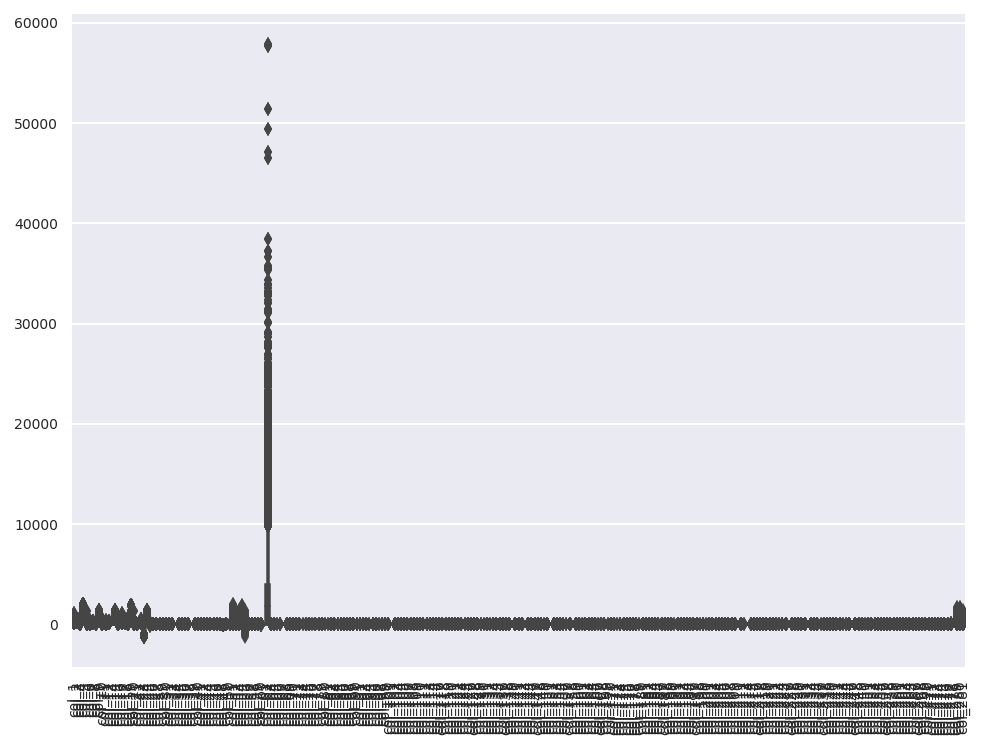

In [99]:
plot = sns.boxplot(data = TrainData_for_SCAL);
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90);

 ### <font color=DARKBLUE>移除部份欄位</font>
 
 移除影響分佈觀察的欄位再觀察一次，這個流程可能會重複數次以觀察各欄位分佈情形
 
<font color=Orange size=5%>◎◎◎ ↓</font>  選擇影響分佈觀察的欄位， 請將 **drop(['B5到達年齡'])** 中的欄位名改為自定欄位名

In [100]:
# '''移除較不同的分佈以觀察其它特徵'''
# plot = sns.boxplot(data=TrainData_for_SCAL.drop(['B5到達年齡'],axis=1).iloc[:,0:15]);
# plot.set_xticklabels(plot.get_xticklabels(), rotation=90);

### <font color=DARKBLUE>觀察特定欄位</font>

如果不需要請在指令前加上井字號 # 轉為註解

<font color=Orange size=5%>◎◎◎ ↓</font>  觀察特定欄位分佈， 請將 **['Total']** 中的欄位名**Total**名改為自定欄位名

In [101]:
# TrainData_for_SCAL['役別'].describe()

## <font color=DARKBLUE>關聯矩陣</font>




此範例以對 Training Data 做觀察處理為主， Testing Data 請自行觀測

如果類別比例懸殊，建議使用降採樣 (或其它方法) 進行預處理



<font color=Orange size=5%>◎◎◎ ↓</font> 將資料分為學習資料X與目標值Y 
<a id="DEFINEXY"></a>

In [102]:
TrainX = TrainData_for_SCAL.drop([TargetY],axis = 1)
TrainY = TrainData_for_SCAL[TargetY]

# '降採樣，如需使用請移除註解'
# # rus = RandomUnderSampler(return_indices = True,ratio = 'auto',random_state = Random_State)
# # TrainX, TrainY, idx_resampled = rus.fit_sample(TrainData_for_SCAL.drop([TargetY],axis = 1), TrainData_for_SCAL[TargetY])

# '洗牌打亂'
# #TrainX,TrainY =  shuffle(TrainX, TrainY ,random_state = Random_State)

# TrainX = pd.DataFrame(TrainX,columns = TrainData_for_SCAL.drop([TargetY],axis = 1).columns)
# TrainY = pd.Series(TrainY)

# TestX = TestData_for_SCAL if TargetY not in TestData_for_SCAL.columns else TestData_for_SCAL.drop([TargetY],axis=1)

# TestY = 0 if TargetY not in TestData_for_SCAL.columns else TestData_for_SCAL[TargetY]


◎◎◎ 如果特徵欄位太多，呈現圖太密密麻麻，請使用以下指令觀察特定欄位區間:
```python
temp = TrainX.iloc[:,50:80].copy()
```

以取代原本的 **temp = TrainX.copy()** ，請將上述指令中的觀察欄位名 **50** 及 **80** 名改為自定目標欄位編號，意思是從 50 看到 80 欄


<font color=Orange size=5%>◎◎◎ ↓</font> 計算X與Y的關係並畫出 

In [103]:
# sns.set(font_scale = 1.7,font = "Microsoft JhengHei")
# plt.rcParams['figure.figsize'] = (16,16)
# temp = TrainX.copy()
# temp.insert(0,'Y',TrainY)
# corrmat = temp.corr()
# corr = sns.heatmap(corrmat.astype(float),linewidths = 0.1,vmax = 1.0, square = True, cmap = plt.cm.viridis, linecolor = 'white', annot = True,annot_kws = {"size": 7});sns.set(font_scale = 0.5)

以上圖為例，可以看到以下欄位其實都是常數，不會改變，所以在本次實驗中可以移除以降低演算法時間複雜度
```PYTHON
['婚姻狀況3','婚姻狀況4']
```
可以使用以下指令移除
```PYTHON
    TrainData.drop(['婚姻狀況3','婚姻狀況4'],axis=1,inplace=True)
    TestData.drop(['婚姻狀況3','婚姻狀況4'],axis=1,inplace=True)
```
<font color=Orange size=5%>◎◎◎ ↓ </font> 如需使用請解除註解 #

In [104]:
# TrainData_for_SCAL.drop(['有幾張主約之效力_53','有幾張主約之效力_47','有幾張主約之效力_52'],axis=1,inplace=True)
# TestData_for_SCAL.drop(['有幾張主約之效力_41','有幾張主約之效力_53','有幾張主約之效力_47','有幾張主約之效力_52'],axis=1,inplace=True)

## <font color=DARKBLUE>觀察目標值分佈</font>
<font color=OliveDrab size=5%>◎◎◎ ↓(直方圖) </font>  

/opt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



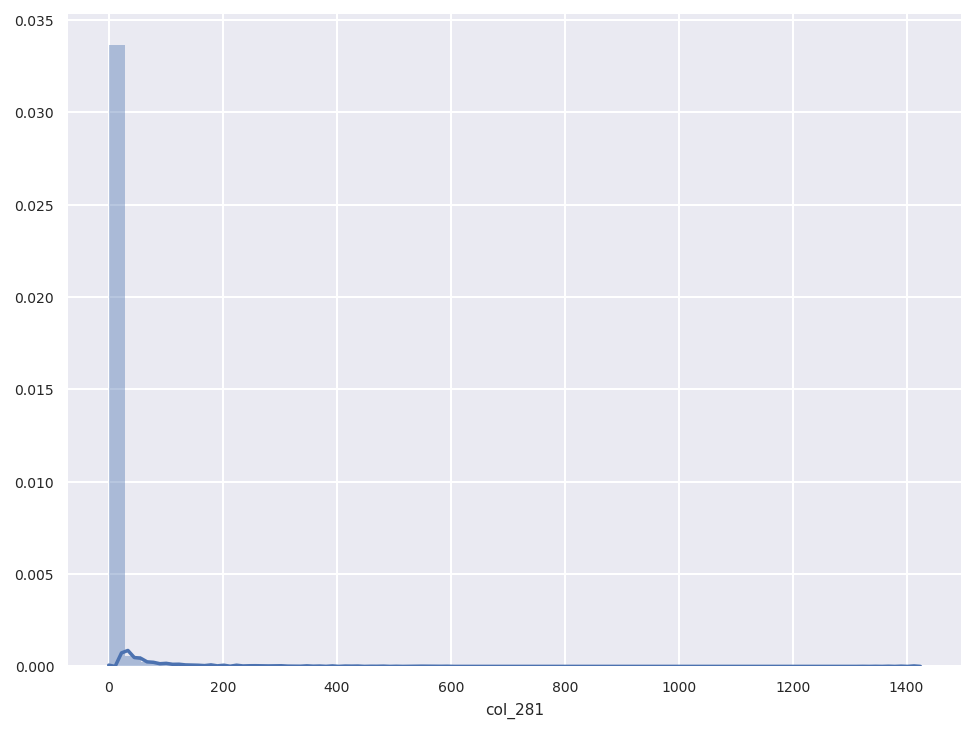

In [105]:
ax = sns.distplot(TrainData_for_SCAL[TargetY])
#'比例相差懸殊可以取log'
#ax.set(xscale = "log")


<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>


<a id="CLASSIFICATION"></a>

------

------
# <font color=DARKBLUE>開始分類</font>


## <font color=RED>資料驗證與演算法</font> 
<font color=RED>在進行機器學習之前，本節欄位請務必執行，以確認各資料
</font> 
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  檢查輸入資料

<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [106]:
if TrainData_for_SCAL.isnull().sum().sum() > 0 or TestData_for_SCAL.isnull().sum().sum() >0 :
    print('請回到 填補缺失值 章節進行填值處理')
if list(TrainData_for_SCAL.select_dtypes(include = [object]).columns) != [] or list(TestData_for_SCAL.select_dtypes(include = [object]).columns) != [] :
    print('請回到 將非數值特徵轉為數值 章節進行非數值特徵處理')


<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  設定資料

<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [107]:
TrainX = TrainData_for_SCAL.drop([TargetY],axis=1)
TrainY = TrainData_for_SCAL[TargetY]

TestX = TestData_for_SCAL if TargetY not in TestData_for_SCAL.columns else TestData_for_SCAL.drop([TargetY],axis = 1)
TestY = None if (TargetY not in TestData_for_SCAL.columns) or TestData_for_SCAL[TargetY].isnull().all().all() else TestData_for_SCAL[TargetY]

TrainX_Na = TrainData_Na.drop([TargetY],axis = 1)
TestX_Na = TestData_Na if TargetY not in TestData_Na.columns.values else TestData_Na.drop([TargetY],axis = 1)

### Scaler
在執行分類演算法之前，時常需對資料進行前處理，將資料 Scaler 化。在此將各欄位 Scaler 先行計算。
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  計算 Train 與 Test 的 Scaler值，可以選擇 Scaler 方法，預設為 MinMaxScaler

<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [108]:
#Scaler = QuantileTransformer()
Scaler = MinMaxScaler()
#Scaler = StandardScaler()
#Scaler = RobustScaler()
#Scaler = Normalizer()

TrainX_Scaler = Scaler.fit_transform(TrainX)
TestX_Scaler = Scaler.transform(TestX)
TrainY_Scaler = np.array(TrainY).reshape(-1, 1)
TrainY_Scaler = Scaler.fit_transform(TrainY_Scaler)
if TestY is not None:
    TestY_Scaler = np.array(TestY).reshape(-1, 1)
    TestY_Scaler = Scaler.transform(TestY_Scaler)

### Build DataSets 
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  
<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [109]:
TrainX = pd.DataFrame(TrainX,columns = TrainData_for_SCAL.drop([TargetY],axis = 1).columns)
TrainX_Scaler = pd.DataFrame(TrainX_Scaler,columns = TrainData_for_SCAL.drop([TargetY],axis = 1).columns)
TestX = pd.DataFrame(TestX,columns = TestData_for_SCAL.drop([TargetY],axis = 1).columns)
TestX_Scaler = pd.DataFrame(TestX_Scaler,columns = TestData_for_SCAL.drop([TargetY],axis = 1).columns)
TrainY = pd.Series(TrainY) 
TrainY_Scaler = pd.Series(TrainY_Scaler.reshape(-1))
TestY = pd.Series(TestY) if TestY is not None else TestY
TestY_Scaler = pd.Series(TestY_Scaler.reshape(-1)) if TestY is not None else TestY

TrainX_Na = pd.DataFrame(TrainX_Na,columns = TrainData_Na.drop([TargetY],axis = 1).columns)


'同時建立表格儲存真實答案'
TrainPredict = pd.DataFrame()
TestPredict  = pd.DataFrame()


本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> train_test_split 切分訓練及驗證

<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [110]:
n_splits = 4
import pickle
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.base import clone
from sklearn.utils import shuffle

ordercols  = ['Algorithm','mean_squared_error','mean_absolute_error','median_absolute_error','explained_variance_score','r2_score']
TestReport = pd.DataFrame(columns = ordercols)
TrainReport = pd.DataFrame(columns = ordercols)
Train_Valid_MSE = {}
Train_MSE = {}
Test_MSE  = {}

from collections import OrderedDict
def Report_Metrics(TestReport,Method,y_true,y_pred) :
    temp = OrderedDict({'Algorithm' : Method,
            'mean_squared_error'  : mean_squared_error(y_true,y_pred),
            'mean_absolute_error' : mean_absolute_error(y_true,y_pred),
            'median_absolute_error' : median_absolute_error(y_true,y_pred),
            'explained_variance_score' : explained_variance_score(y_true,y_pred),
            "r2_score" : r2_score(y_true,y_pred),           
           })
    return pd.DataFrame([temp],columns = ordercols)


# X_train, X_valid, X_train_sc, X_valid_sc, y_train, y_valid = train_test_split(TrainX, TrainX_Scaler, TrainY, test_size = 0.20, random_state = Random_State)
# X_light_train, X_light_valid, y_light_train, y_light_valid = train_test_split(TrainX_Na, TrainY_Na, test_size = 0.20, random_state = Random_State)

class OneFold:
    def split(self,dataX,dataY = None):
        yield dataX.index.values,dataX.index.values
    n_splits = 1

folds = KFold(n_splits = n_splits, shuffle = True, random_state = Random_State) if n_splits > 1 else OneFold()

print('訓練資料筆數：', TrainX.shape[0], '   訓練資料欄位數：',TrainX.shape[1])
print('測試資料筆數：', TestX.shape[0] , '   測試資料欄位數：',TestX.shape[1])

訓練資料筆數： 52397    訓練資料欄位數： 280
測試資料筆數： 214    測試資料欄位數： 280


### 分類演算法
接下來會使用數種分類演算法進行分類，儲存分類模型並產出分類結果

<font color=CRISOM>每個演算法都會產生預測答案的欄位 (可能包含答案與其機率) ，並存於 Test_answer.CSV 檔案中，如果重複執行演算法，則前次結果會被覆蓋掉 </font> 


<br>
<font color=RED>在進行機器學習之前，本欄位請務必執行，以載入各種資料庫  </font> 


<font color=OliveDrab size=5%> ◎◎◎ ↓ </font> 導入演算法資料庫並建立 Baseline 分類器

<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [111]:
from sklearn.dummy import DummyRegressor

clf_pred = np.zeros(TrainY.shape[0])

clf = DummyRegressor(strategy = 'mean')

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX)) :
    train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]

    clf.fit(train_x, train_y)
    
    clf_pred[valid_idx] += clf.predict(valid_x).copy() 
    
MSE_dummy = mean_squared_error(TrainY,clf_pred)
    
print ('DummyRegressor 的交叉驗證 MSE：'+ str (MSE_dummy) +'\n')

DummyRegressor 的交叉驗證 MSE：1421.7934007790493




<font size=3% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[XGboost](#XGboost) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[lightGBM](#lightGBM) </font>&nbsp;&nbsp; 
<font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font>&nbsp;&nbsp;<br ><br >
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[K-NN](#K-NN) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Naive Bayes](#NaiveBayes) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Deep Learning](#DeepLearning) </font>


<a id="DecisionTree"></a>

## <font color=DARKBLUE>使用決策樹進行分類</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。 


**MSE_tree**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立決策樹模型，並以 cross-validation 檢驗效能

In [112]:
from sklearn.tree import DecisionTreeRegressor
clfname = 'DecisionTree'
clf = DecisionTreeRegressor(random_state = Random_State)

(train_idx, valid_idx) = next(folds.split(TrainX, TrainY)) 
flag_idx = train_idx
train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]

clf.fit(train_x, train_y)
    
valid_y_pred = clf.predict(valid_x).copy() 
    
mse = mean_squared_error(valid_y,valid_y_pred)
    
print(clfname + '的初步驗證 MSE：' + str(mse.round(8)) + '\n')
print('大約是 Baseline DummyRegressor 的' , (mse / MSE_dummy).round(3),'倍')

DecisionTree的初步驗證 MSE：1079.81198579

大約是 Baseline DummyRegressor 的 0.759 倍


### <font color=DARKBLUE>建立完整決策樹</font>
 
 使用整個資料建立決策樹

#### 調參數 <font color=RED>(耗時注意)</font> 

 <font color=YELLOW, size=3%>注意，本段程式碼為調參數迴圈，速度緩慢，如只是測試實驗不建議解除註解</font> 
 
目前已註解 # ，如要使用請移除下方程式碼區塊的註解符號#

<!---
{'criterion': 'entropy',
 'max_depth': 14,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 32}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立決策樹，並將其儲存為 clfdec.model (格式為 pickle檔案)

In [113]:
clf_pred = np.zeros(TrainY.shape[0])

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX, TrainY)) :
    if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)):
        train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]
        clf = clone(clf)
        clf.fit(train_x, train_y)
    pred = clf.predict(valid_x) if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)) else valid_y_pred
    
    with open(r"Model/" + clfname + str(n_fold + 1) + ".model", "wb") as output_file:
        pickle.dump(clf, output_file) 
    mse = mean_squared_error(valid_y,pred) 

    print (clfname + ' ' + str(n_fold + 1) + '-fold 的 MSE：' + str (mse.round(8)) +'\n')
        
    clf_pred[valid_idx] += pred  
    
MSE_tree = mean_squared_error(TrainY,clf_pred) 
    
print ('完整交叉驗證 MSE：' + str(MSE_tree) + '\n')
        
    
TrainPredict = pd.DataFrame() if not os.path.exists(Output_train_Pred) else pd.read_csv(Output_train_Pred) 
    
TrainPredict[clfname] = clf_pred

TrainReport = pd.concat([TrainReport,Report_Metrics(
TrainReport,clfname,TrainY,clf_pred)]).drop_duplicates(subset = ['Algorithm'], keep = 'last')
    
TrainPredict.to_csv(Output_train_Pred, index = False,header = True,encoding = 'utf8')



DecisionTree 1-fold 的 MSE：1079.81198579

DecisionTree 2-fold 的 MSE：1045.05820728

DecisionTree 3-fold 的 MSE：1211.04781987

DecisionTree 4-fold 的 MSE：1246.88941823

完整交叉驗證 MSE：1145.7006002835192



### 模型分析

同時畫出各特徵的重要程度 **不是每一個演算法都能呈現特徵重要度**

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  畫出前15重要的 feature 的重要程度

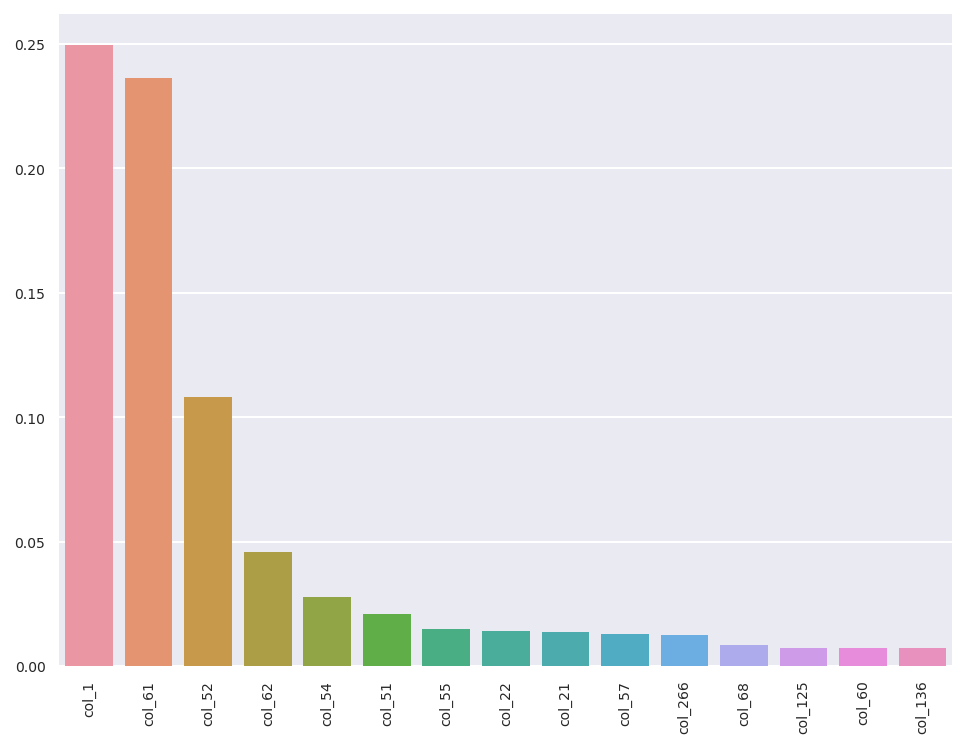

In [114]:
col_size = len(TrainX_Na.columns) if TrainX_Na.columns.size < 15 else 15
important_columns = [x for _,x in sorted(zip(clf.feature_importances_,TrainX_Na.columns),reverse = True)]
sns.set(font_scale = 0.7,font = "DejaVu Sans")
barplot = sns.barplot(x = important_columns[:col_size], y = sorted(clf.feature_importances_,reverse = True)[:col_size],order = important_columns[:col_size])
barplot.set_xticklabels(barplot.get_xticklabels(), rotation = 90);

### <font color=DARKBLUE>使用決策樹進行預測</font>
#### 讀取clfdec.model，Test data 預測，如果Test data 有答案則順便產生預測報告

如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

In [115]:
clf_pred_test = np.zeros(TestY.shape[0])

for i in range(n_splits):
    with open(r"Model/" + clfname + str(i + 1) + ".model", "rb") as input_file:
        clf = pickle.load(input_file)        
    clf_pred_test += clf.predict(TestX)/n_splits
    
TestPredict = pd.DataFrame() if not os.path.exists(Output_test_Pred) else pd.read_csv(Output_test_Pred)
TestPredict[clfname] = clf_pred_test  
    
if TestY is not None:
    mse = mean_squared_error(TestY,clf_pred_test) 
    
    print ('測試資料的 MSE：' + str (mse.round(8)) + '\n')
           
    if 'Truth' not in TestPredict:
        TestPredict.insert(0, 'Truth', TestY.values) 

    TestReport = pd.concat([TestReport,Report_Metrics(
    TestReport,clfname,TestY,clf_pred_test)]).drop_duplicates(subset=['Algorithm'],keep='last')

TestPredict.to_csv(Output_test_Pred, index = False,header = True,encoding = 'utf8')
print('測試資料的結果已存入檔案')

測試資料的 MSE：893.73495911

測試資料的結果已存入檔案



<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>


<font size=3% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[XGboost](#XGboost) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[lightGBM](#lightGBM) </font>&nbsp;&nbsp; 
<font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font>&nbsp;&nbsp;<br ><br >
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[K-NN](#K-NN) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Naive Bayes](#NaiveBayes) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Deep Learning](#DeepLearning) </font>

<a id="RandomForest"></a>

## <font color=DARKBLUE>使用隨機森林進行分類</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立隨機森林模型，並以 cross-validation 檢驗效能

In [116]:
from sklearn.ensemble import RandomForestRegressor
clfname = 'RandomForest'
clf = RandomForestRegressor(random_state = Random_State, n_jobs = n_jobs, n_estimators = 100)

(train_idx, valid_idx) = next(folds.split(TrainX, TrainY)) 

train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]

clf.fit(train_x, train_y)
    
valid_y_pred = clf.predict(valid_x).copy() 
    
mse = mean_squared_error(valid_y,valid_y_pred) 
    
print(clfname + '的初步驗證 MSE：' + str(mse.round(8)) + '\n')
print('大約是 Baseline DummyRegressor 的' , (mse / MSE_dummy).round(3),'倍')

RandomForest的初步驗證 MSE：568.38517556

大約是 Baseline DummyRegressor 的 0.4 倍


### <font color=DARKBLUE>建立隨機森林</font>



#### 調參數 <font color=RED>(耗時注意)</font> 

 <font color=YELLOW, size=3%>注意，本段程式碼為調參數迴圈，速度緩慢，如只是測試實驗不建議解除註解</font> 
 
目前已註解 # ，如要使用請移除下方程式碼區塊的註解符號#

In [117]:
# param_grid = {"n_estimators" : range(10,100,20),
#               "criterion": ["mse", "mae"],
#               "max_features" : ["auto","sqrt","log2"],
#               "min_samples_split": range(2,20,6),
#               "max_depth": [None] + list(range(2,20,6)),
#               "min_samples_leaf": range(1,15,6),
#               "max_leaf_nodes": [None] + list(range(5,15,5)),
#               }
# clfrfc_Grid = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error',verbose=1,n_jobs=n_jobs)
# clfrfc_Grid.fit(TrainX,TrainY)
# clfrfc = clfrfc_Grid.best_estimator_
# clfrfc_Grid.best_params_

<!---
{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 90}
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立隨機森林，並將其儲存為 clfrfc.model (格式為 pickle檔案)

In [118]:
clf_pred = np.zeros(TrainY.shape[0])

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX, TrainY)) :
    if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)):
        train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]
        clf = clone(clf)
        clf.fit(train_x, train_y)
    pred = clf.predict(valid_x) if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)) else valid_y_pred
    
    with open(r"Model/" + clfname + str(n_fold + 1) + ".model", "wb") as output_file:
        pickle.dump(clf, output_file) 
    mse = mean_squared_error(valid_y,pred) 

    print (clfname + ' ' + str(n_fold + 1) + '-fold 的 MSE：' + str (mse.round(8)) +'\n')
        
    clf_pred[valid_idx] += pred  
    
MSE_RF = mean_squared_error(TrainY,clf_pred) 
    
print ('完整交叉驗證 MSE：' + str(MSE_RF) + '\n')
        
    
TrainPredict = pd.DataFrame() if not os.path.exists(Output_train_Pred) else pd.read_csv(Output_train_Pred) 
    
TrainPredict[clfname] = clf_pred

TrainReport = pd.concat([TrainReport,Report_Metrics(
TrainReport,clfname,TrainY,clf_pred)]).drop_duplicates(subset = ['Algorithm'], keep = 'last')
    
TrainPredict.to_csv(Output_train_Pred, index = False,header = True,encoding = 'utf8')



RandomForest 1-fold 的 MSE：568.38517556

RandomForest 2-fold 的 MSE：608.56544406

RandomForest 3-fold 的 MSE：603.35117839

RandomForest 4-fold 的 MSE：643.35125379

完整交叉驗證 MSE：605.9125467218864



### 模型分析

同時畫出各特徵的重要程度 **不是每一個演算法都能呈現特徵重要度**

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  畫出前15重要的 feature 的重要程度

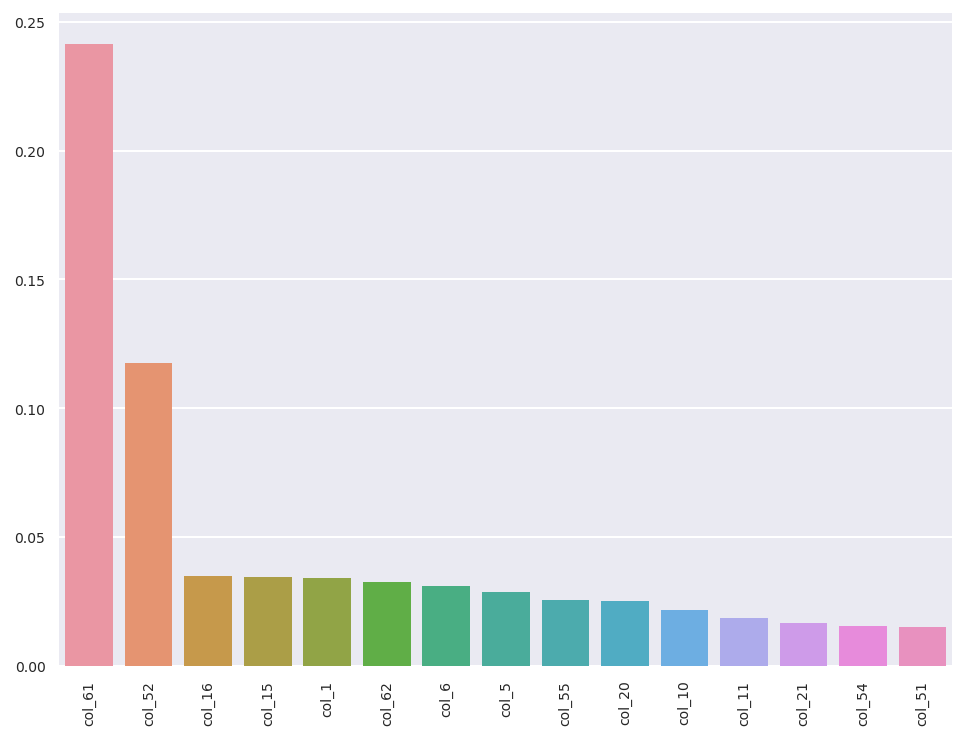

In [119]:
col_size = len(TrainX_Na.columns) if TrainX_Na.columns.size < 15 else 15
important_columns = [x for _,x in sorted(zip(clf.feature_importances_,TrainX_Na.columns),reverse = True)]
sns.set(font_scale = 0.7,font = "DejaVu Sans")
barplot = sns.barplot(x = important_columns[:col_size], y = sorted(clf.feature_importances_,reverse = True)[:col_size],order = important_columns[:col_size])
barplot.set_xticklabels(barplot.get_xticklabels(), rotation = 90);

### <font color=DARKBLUE>使用隨機森林進行預測</font>
#### 讀取clfrfc.model，對Test data 預測，如果Test data 有答案則順便產生預測報告

如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

In [120]:
clf_pred_test = np.zeros(TestY.shape[0])

for i in range(n_splits):
    with open(r"Model/" + clfname + str(i + 1) + ".model", "rb") as input_file:
        clf = pickle.load(input_file)        
    clf_pred_test += clf.predict(TestX)/n_splits
    
TestPredict = pd.DataFrame() if not os.path.exists(Output_test_Pred) else pd.read_csv(Output_test_Pred)
TestPredict[clfname] = clf_pred_test  
    
if TestY is not None:
    mse = mean_squared_error(TestY,clf_pred_test) 
    
    print ('測試資料的 MSE：' + str (mse.round(8)) + '\n')
           
    if 'Truth' not in TestPredict:
        TestPredict.insert(0, 'Truth', TestY.values) 

    TestReport = pd.concat([TestReport,Report_Metrics(
    TestReport,clfname,TestY,clf_pred_test)]).drop_duplicates(subset=['Algorithm'],keep='last')

TestPredict.to_csv(Output_test_Pred, index=False,header=True,encoding = 'utf8')
print('測試資料的結果已存入檔案')

測試資料的 MSE：762.40559973

測試資料的結果已存入檔案



<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>


<font size=3% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[XGboost](#XGboost) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[lightGBM](#lightGBM) </font>&nbsp;&nbsp; 
<font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font>&nbsp;&nbsp;<br ><br >
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[K-NN](#K-NN) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Naive Bayes](#NaiveBayes) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Deep Learning](#DeepLearning) </font>

<a id="XGboost"></a>

## <font color=DARKBLUE>使用 ExtraTree 進行分類 </font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立 ExtraTree 模型，並以 cross-validation 檢驗效能

In [121]:
from sklearn.ensemble import ExtraTreesRegressor
clf =  ExtraTreesRegressor(n_estimators = 100, random_state = Random_State)
clfname = 'ExtraTree'

(train_idx, valid_idx) = next(folds.split(TrainX, TrainY)) 

train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]

clf.fit(train_x, train_y)
    
valid_y_pred = clf.predict(valid_x).copy() 
    
mse = mean_squared_error(valid_y,valid_y_pred) 
    
print(clfname + '的初步驗證 MSE：' + str(mse.round(8)) + '\n')
print('大約是 Baseline DummyRegressor 的' , (mse / MSE_dummy).round(3),'倍')

ExtraTree的初步驗證 MSE：581.45298258

大約是 Baseline DummyRegressor 的 0.409 倍


### <font color=DARKBLUE>建立 ExtraTree </font>



<!---
{'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立 ExtraTree，並將其儲存為 clfgnb.model (格式為 pickle檔案)

In [122]:
clf_pred = np.zeros(TrainY.shape[0])

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX, TrainY)) :
    if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)):
        train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]
        clf = clone(clf)
        clf.fit(train_x, train_y)
    pred = clf.predict(valid_x) if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)) else valid_y_pred
    
    with open(r"Model/" + clfname + str(n_fold + 1) + ".model", "wb") as output_file:
        pickle.dump(clf, output_file) 
    mse = mean_squared_error(valid_y,pred) 

    print (clfname + ' ' + str(n_fold + 1) + '-fold 的 MSE：' + str (mse.round(8)) +'\n')
        
    clf_pred[valid_idx] += pred  
    
MSE_ET = mean_squared_error(TrainY,clf_pred) 
    
print ('完整交叉驗證 MSE：' + str(MSE_ET) + '\n')
        
    
TrainPredict = pd.DataFrame() if not os.path.exists(Output_train_Pred) else pd.read_csv(Output_train_Pred) 
    
TrainPredict[clfname] = clf_pred

TrainReport = pd.concat([TrainReport,Report_Metrics(
TrainReport,clfname,TrainY,clf_pred)]).drop_duplicates(subset = ['Algorithm'], keep = 'last')
    
TrainPredict.to_csv(Output_train_Pred, index = False,header = True,encoding = 'utf8')



ExtraTree 1-fold 的 MSE：581.45298258

ExtraTree 2-fold 的 MSE：596.73312077

ExtraTree 3-fold 的 MSE：752.96904728

ExtraTree 4-fold 的 MSE：668.13328953

完整交叉驗證 MSE：649.8208052108945



### 模型分析

同時畫出各特徵的重要程度 **不是每一個演算法都能呈現特徵重要度**

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  畫出前15重要的 feature 的重要程度

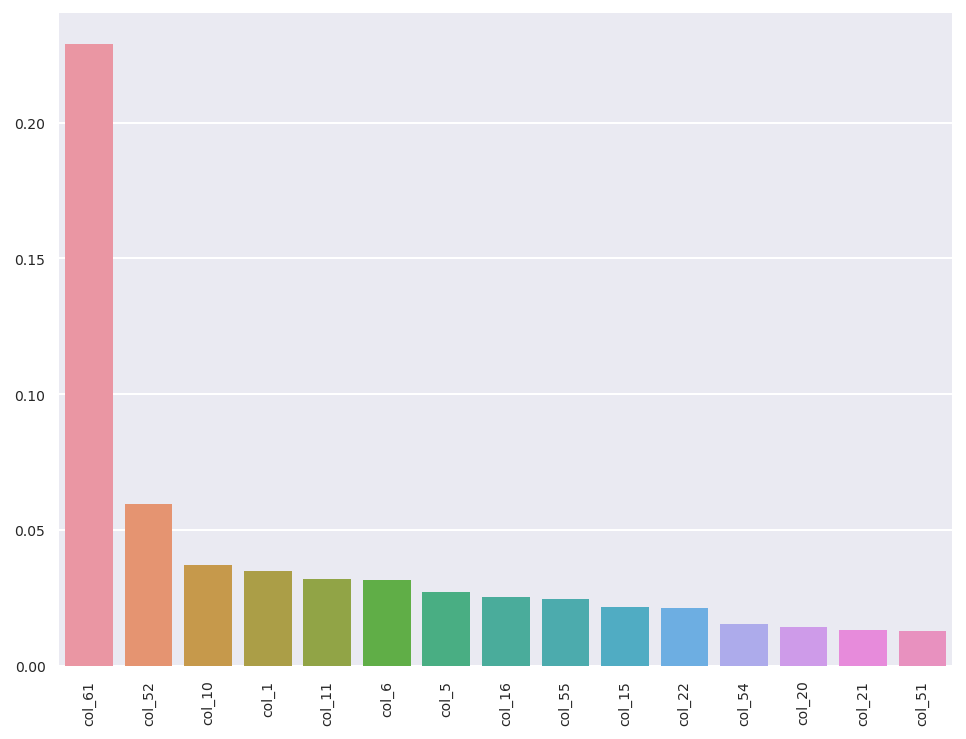

In [123]:
col_size = len(TrainX.columns) if TrainX.columns.size < 15 else 15
important_columns = [x for _,x in sorted(zip(clf.feature_importances_,TrainX.columns),reverse = True)]
sns.set(font_scale = 0.7,font = "DejaVu Sans")
barplot = sns.barplot(x = important_columns[:col_size], y = sorted(clf.feature_importances_,reverse = True)[:col_size],order = important_columns[:col_size])
barplot.set_xticklabels(barplot.get_xticklabels(), rotation = 90);

### <font color=DARKBLUE>使用 ExtraTree 進行預測</font>
#### 讀取clf.model，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

In [124]:
clf_pred_test = np.zeros(TestY.shape[0])

for i in range(n_splits):
    with open(r"Model/" + clfname + str(i + 1) + ".model", "rb") as input_file:
        clf = pickle.load(input_file)        
    clf_pred_test += clf.predict(TestX)/n_splits
    
TestPredict = pd.DataFrame() if not os.path.exists(Output_test_Pred) else pd.read_csv(Output_test_Pred)
TestPredict[clfname] = clf_pred_test  
    
if TestY is not None:
    mse = mean_squared_error(TestY,clf_pred_test) 
    
    print ('測試資料的 MSE：' + str (mse.round(8)) + '\n')
           
    if 'Truth' not in TestPredict:
        TestPredict.insert(0, 'Truth', TestY.values) 

    TestReport = pd.concat([TestReport,Report_Metrics(
    TestReport,clfname,TestY,clf_pred_test)]).drop_duplicates(subset=['Algorithm'],keep='last')

TestPredict.to_csv(Output_test_Pred, index=False,header=True,encoding = 'utf8')
print('測試資料的結果已存入檔案')

測試資料的 MSE：751.42420531

測試資料的結果已存入檔案



<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>


<font size=3% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[ExtraTree](#ExtraTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[XGboost](#XGboost) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[lightGBM](#lightGBM) </font>&nbsp;&nbsp; <br ><br >
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[K-NN](#K-NN) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Deep Learning](#DeepLearning) </font>

<a id="XGboost"></a>

## <font color=DARKBLUE>使用 Gradient Boosting 進行分類-XGboost</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立 XGboost 模型，並以 cross-validation 檢驗效能

In [125]:
import xgboost as xgb
clf = xgb.XGBRegressor(nthread = n_jobs,num_round = 1000)
clfname = 'XGBoost'

(train_idx, valid_idx) = next(folds.split(TrainX, TrainY)) 

train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]

clf.fit(train_x, train_y)
    
valid_y_pred = clf.predict(valid_x).copy() 
    
mse = mean_squared_error(valid_y,valid_y_pred) 
    
print(clfname + '的初步驗證 MSE：' + str(mse.round(8)) + '\n')
print('大約是 Baseline DummyRegressor 的' , (mse / MSE_dummy).round(3),'倍')

XGBoost的初步驗證 MSE：627.70375518

大約是 Baseline DummyRegressor 的 0.441 倍


### <font color=DARKBLUE>建立 XGboost </font>



#### 調參數 <font color=RED>(耗時注意)</font> 

 <font color=YELLOW, size=3%>注意，本段程式碼為調參數迴圈，速度緩慢，如只是測試實驗不建議解除註解</font> 
 
目前已註解 # ，如要使用請移除下方程式碼區塊的註解符號#

In [126]:
# param_grid = {"max_depth" : range(2,8,1),
#               "learning_rate": np.logspace(-3.5, 0, 8),
#               "n_estimators" :  np.arange(120,1500,80),
#               "subsample": np.arange(0.4,1.1,0.2),
#               "reg_alpha": np.arange(0.01,0.3,0.05),
#               }
# clfxgb_Grid = GridSearchCV(xgb.XGBRegressor(seed=Random_State), param_grid=param_grid, scoring='neg_mean_squared_error',verbose=1,n_jobs=n_jobs)
# clfxgb_Grid.fit(TrainX.values[:8000],TrainY[:8000])
# clfxgb = clfxgb_Grid.best_estimator_
# clfxgb_Grid.best_params_


# {'learning_rate': 0.001,
#  'max_depth': 5,
#  'n_estimators': 920,
#  'reg_alpha': 0.16000000000000003,
#  'subsample': 0.7}

<!---
{'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立 XGboost，並將其儲存為 clfxgb.model (格式為 pickle檔案)

In [127]:
clf_pred = np.zeros(TrainY.shape[0])

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX, TrainY)) :
    if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)):
        train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]
        clf = clone(clf)
        clf.fit(train_x, train_y)
    pred = clf.predict(valid_x) if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)) else valid_y_pred
    
    with open(r"Model/" + clfname + str(n_fold + 1) + ".model", "wb") as output_file:
        pickle.dump(clf, output_file) 
    mse = mean_squared_error(valid_y,pred) 

    print (clfname + ' ' + str(n_fold + 1) + '-fold 的 MSE：' + str (mse.round(8)) +'\n')
        
    clf_pred[valid_idx] += pred  
    
MSE_XG = mean_squared_error(TrainY,clf_pred) 
    
print ('完整交叉驗證 MSE：' + str(MSE_XG) + '\n')
        
    
TrainPredict = pd.DataFrame() if not os.path.exists(Output_train_Pred) else pd.read_csv(Output_train_Pred) 
    
TrainPredict[clfname] = clf_pred

TrainReport = pd.concat([TrainReport,Report_Metrics(
TrainReport,clfname,TrainY,clf_pred)]).drop_duplicates(subset = ['Algorithm'], keep = 'last')
    
TrainPredict.to_csv(Output_train_Pred, index = False,header = True,encoding = 'utf8')


XGBoost 1-fold 的 MSE：627.70375518

XGBoost 2-fold 的 MSE：569.5946499

XGBoost 3-fold 的 MSE：559.74652578

XGBoost 4-fold 的 MSE：669.35514812

完整交叉驗證 MSE：606.6004225124225



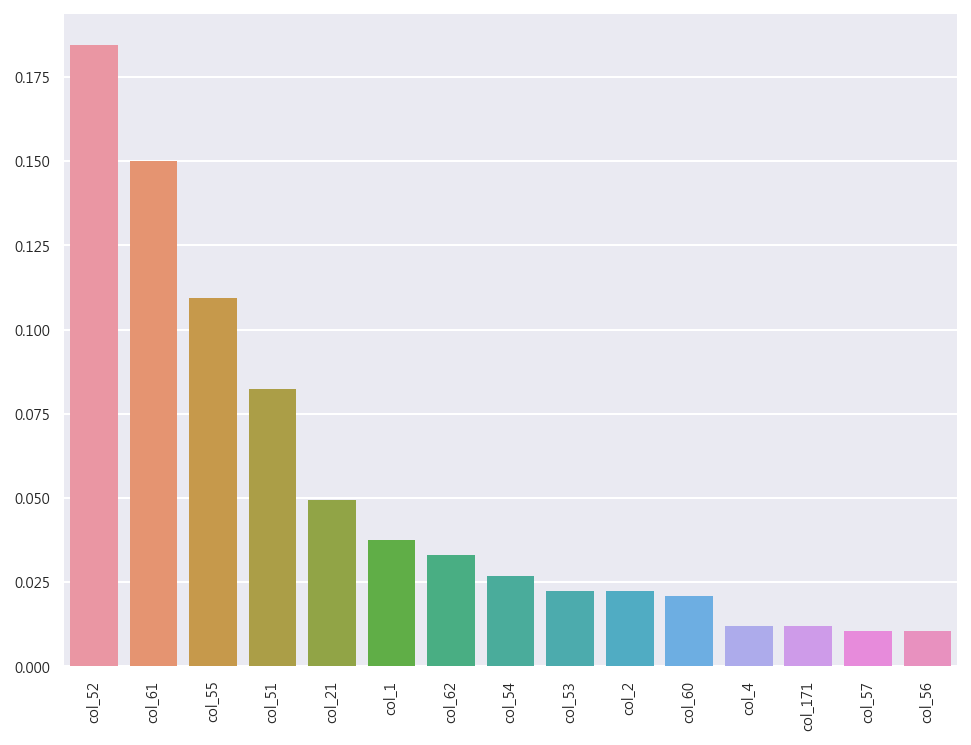

In [128]:
col_size = len(TrainX_Na.columns) if TrainX_Na.columns.size < 15 else 15
important_columns = [x for _,x in sorted(zip(clf.feature_importances_,TrainX_Na.columns),reverse = True)]
sns.set(font_scale = 0.7,font = "Microsoft JhengHei")
barplot = sns.barplot(x = important_columns[:col_size], y = sorted(clf.feature_importances_,reverse = True)[:col_size],order = important_columns[:col_size])
barplot.set_xticklabels(barplot.get_xticklabels(), rotation = 90);

### <font color=DARKBLUE>使用 XGboost 進行預測</font>
#### 讀取clfxgb.model，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

In [129]:
clf_pred_test = np.zeros(TestY.shape[0])

for i in range(n_splits):
    with open(r"Model/" + clfname + str(i + 1) + ".model", "rb") as input_file:
        clf = pickle.load(input_file)        
    clf_pred_test += clf.predict(TestX)/n_splits
    
TestPredict = pd.DataFrame() if not os.path.exists(Output_test_Pred) else pd.read_csv(Output_test_Pred)
TestPredict[clfname] = clf_pred_test  
    
if TestY is not None:
    mse = mean_squared_error(TestY,clf_pred_test) 
    
    print ('測試資料的 MSE：' + str (mse.round(8)) + '\n')
           
    if 'Truth' not in TestPredict:
        TestPredict.insert(0, 'Truth', TestY.values) 

    TestReport = pd.concat([TestReport,Report_Metrics(
    TestReport,clfname,TestY,clf_pred_test)]).drop_duplicates(subset=['Algorithm'],keep='last')

TestPredict.to_csv(Output_test_Pred, index=False,header=True,encoding = 'utf8')
print('測試資料的結果已存入檔案')

測試資料的 MSE：653.2028883

測試資料的結果已存入檔案



<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>


<font size=3% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[XGboost](#XGboost) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[lightGBM](#lightGBM) </font>&nbsp;&nbsp; 
<font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font>&nbsp;&nbsp;<br ><br >
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[K-NN](#K-NN) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Naive Bayes](#NaiveBayes) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Deep Learning](#DeepLearning) </font>

<a id="lightGBM"></a>

## <font color=DARKBLUE>使用lightGBM進行分類(Gradient Boosting)</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立 lightGBM 模型，並以 cross-validation 檢驗效能

In [130]:
from lightgbm import LGBMRegressor
clf = LGBMRegressor(nthread = n_jobs,n_estimators = 1000)
clfname = 'LightGBM'

(train_idx, valid_idx) = next(folds.split(TrainX, TrainY)) 

train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]

clf.fit(train_x, train_y)
    
valid_y_pred = clf.predict(valid_x).copy() 
    
mse = mean_squared_error(valid_y,valid_y_pred) 
    
print(clfname + '的初步驗證 MSE：' + str(mse.round(8)) + '\n')
print('大約是 Baseline DummyRegressor 的' , (mse / MSE_dummy).round(3),'倍')

LightGBM的初步驗證 MSE：556.78525813

大約是 Baseline DummyRegressor 的 0.392 倍


### <font color=DARKBLUE>建立 lightGBM </font>

#### 調參數 <font color=RED>(耗時注意)</font> 

 <font color=YELLOW, size=3%>注意，本段程式碼為調參數迴圈，速度緩慢，如只是測試實驗不建議解除註解</font> 
 
目前已註解 # ，如要使用請移除下方程式碼區塊的註解符號#

In [131]:
# param_grid = {"max_depth" : range(2,8,1),
#               "learning_rate": np.logspace(-3.5, 0, 8),
#               "n_estimators" :  np.arange(120,1500,80),
#               "subsample": np.arange(0.4,1.1,0.2),
#               "reg_alpha": np.arange(0.01,0.3,0.05),
#               }
# clfgbm_Grid = GridSearchCV(LGBMRegressor(seed =Random_State), param_grid=param_grid, scoring='neg_mean_squared_error',verbose=1,n_jobs=n_jobs)
# clfgbm_Grid.fit(TrainX.values[:8000],TrainY[:8000])
# clfgbm = clfgbm_Grid.best_estimator_
# clfgbm_Grid.best_params_


# {'learning_rate': 0.001,
#  'max_depth': 5,
#  'n_estimators': 920,
#  'reg_alpha': 0.16000000000000003,
#  'subsample': 0.7}

<!---
{'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立 lightGBM ，並將其儲存為 clfgbm.model (格式為 pickle檔案)

In [132]:
clf_pred = np.zeros(TrainY.shape[0])

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX, TrainY)) :
    if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)):
        train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]
        clf = clone(clf)
        clf.fit(train_x, train_y)
    pred = clf.predict(valid_x) if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)) else valid_y_pred
    
    with open(r"Model/" + clfname + str(n_fold + 1) + ".model", "wb") as output_file:
        pickle.dump(clf, output_file) 
    mse = mean_squared_error(valid_y,pred) 

    print (clfname + ' ' + str(n_fold + 1) + '-fold 的 MSE：' + str (mse.round(8)) +'\n')
        
    clf_pred[valid_idx] += pred  
    
MSE_L = mean_squared_error(TrainY,clf_pred) 
    
print ('完整交叉驗證 MSE：' + str(MSE_L) + '\n')
        
    
TrainPredict = pd.DataFrame() if not os.path.exists(Output_train_Pred) else pd.read_csv(Output_train_Pred) 
    
TrainPredict[clfname] = clf_pred

TrainReport = pd.concat([TrainReport,Report_Metrics(
TrainReport,clfname,TrainY,clf_pred)]).drop_duplicates(subset = ['Algorithm'], keep = 'last')
    
TrainPredict.to_csv(Output_train_Pred, index = False,header = True,encoding = 'utf8')

LightGBM 1-fold 的 MSE：556.78525813

LightGBM 2-fold 的 MSE：635.73618437

LightGBM 3-fold 的 MSE：562.54256437

LightGBM 4-fold 的 MSE：653.56717703

完整交叉驗證 MSE：602.1569300371748



### 模型分析

同時畫出各特徵的重要程度 **不是每一個演算法都能呈現特徵重要度**

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  畫出前15重要的 feature 的重要程度

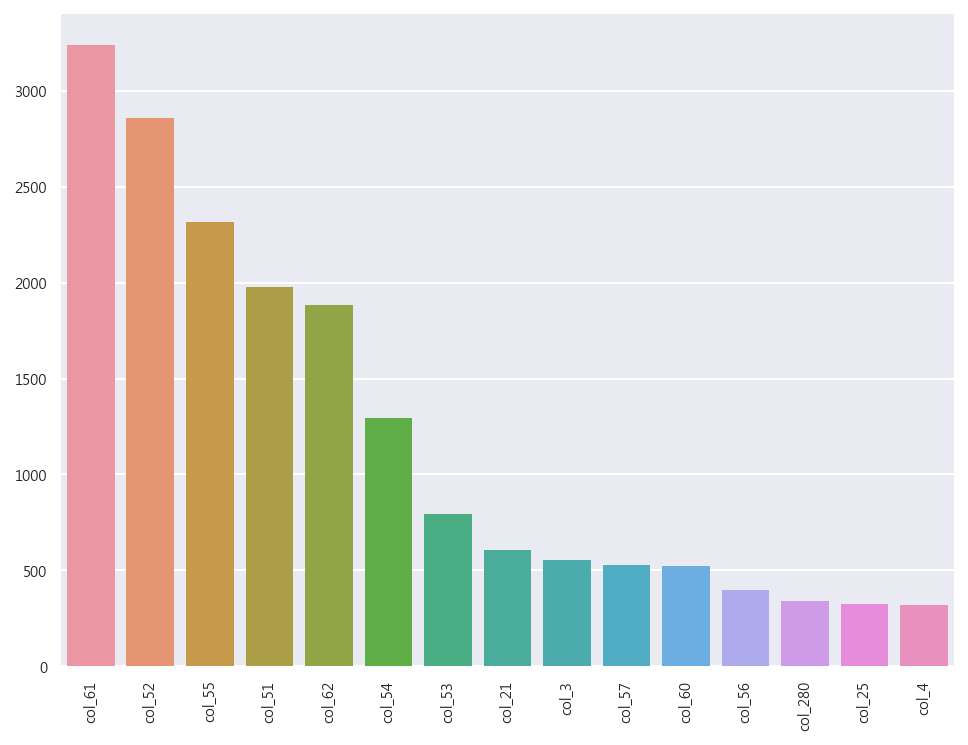

In [133]:
col_size = len(TrainX_Na.columns) if TrainX_Na.columns.size < 15 else 15
important_columns = [x for _,x in sorted(zip(clf.feature_importances_,TrainX_Na.columns),reverse = True)]
sns.set(font_scale = 0.7,font = "Microsoft JhengHei")
barplot = sns.barplot(x = important_columns[:col_size], y = sorted(clf.feature_importances_,reverse = True)[:col_size],order = important_columns[:col_size])
barplot.set_xticklabels(barplot.get_xticklabels(), rotation = 90);

### <font color=DARKBLUE>使用 lightGBM 進行預測</font>
#### 讀取clfgbm.model，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

In [134]:
clf_pred_test = np.zeros(TestY.shape[0])

for i in range(n_splits):
    with open(r"Model/" + clfname + str(i + 1) + ".model", "rb") as input_file:
        clf = pickle.load(input_file)        
    clf_pred_test += clf.predict(TestX)/n_splits
    
TestPredict = pd.DataFrame() if not os.path.exists(Output_test_Pred) else pd.read_csv(Output_test_Pred)
TestPredict[clfname] = clf_pred_test  
    
if TestY is not None:
    mse = mean_squared_error(TestY,clf_pred_test) 
    
    print ('測試資料的 MSE：' + str (mse.round(8)) + '\n')
           
    if 'Truth' not in TestPredict:
        TestPredict.insert(0, 'Truth', TestY.values) 

    TestReport = pd.concat([TestReport,Report_Metrics(
    TestReport,clfname,TestY,clf_pred_test)]).drop_duplicates(subset=['Algorithm'],keep='last')

TestPredict.to_csv(Output_test_Pred, index=False,header=True,encoding = 'utf8')
print('測試資料的結果已存入檔案')

測試資料的 MSE：796.18720022

測試資料的結果已存入檔案



<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>


<font size=3% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[XGboost](#XGboost) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[lightGBM](#lightGBM) </font>&nbsp;&nbsp; 
<font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font>&nbsp;&nbsp;<br ><br >
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[K-NN](#K-NN) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Naive Bayes](#NaiveBayes) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Deep Learning](#DeepLearning) </font>

<a id="Ridge"></a>

## <font color=DARKBLUE>使用 Ridge Regressor 進行分類</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立 Ridge classifier 模型，並以 cross-validation 檢驗效能

In [135]:
from sklearn.linear_model import Ridge
clf =  Ridge()
clfname='RidgeRegressor'

(train_idx, valid_idx) = next(folds.split(TrainX, TrainY)) 

train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]

clf.fit(train_x, train_y)
    
valid_y_pred = clf.predict(valid_x).copy() 
    
mse = mean_squared_error(valid_y,valid_y_pred) 
    
print(clfname + '的初步驗證 MSE：' + str(mse.round(8)) + '\n')
print('大約是 Baseline DummyRegressor 的' , (mse / MSE_dummy).round(3),'倍')

RidgeRegressor的初步驗證 MSE：880.95818714

大約是 Baseline DummyRegressor 的 0.62 倍


### <font color=DARKBLUE>建立 Ridge Regressor  </font>



<!---
{'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立 Ridge regressor ，並將其儲存為 clfrig.model (格式為 pickle檔案)

In [136]:
clf_pred = np.zeros(TrainY.shape[0])

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX, TrainY)) :
    if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)):
        train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]
        clf = clone(clf)
        clf.fit(train_x, train_y)
    pred = clf.predict(valid_x) if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)) else valid_y_pred
    
    with open(r"Model/" + clfname + str(n_fold + 1) + ".model", "wb") as output_file:
        pickle.dump(clf, output_file) 
    mse = mean_squared_error(valid_y,pred) 

    print (clfname + ' ' + str(n_fold + 1) + '-fold 的 MSE：' + str (mse.round(8)) +'\n')
        
    clf_pred[valid_idx] += pred  
    
MSE_RR = mean_squared_error(TrainY,clf_pred) 
    
print ('完整交叉驗證 MSE：' + str(MSE_RR) + '\n')
        
    
TrainPredict = pd.DataFrame() if not os.path.exists(Output_train_Pred) else pd.read_csv(Output_train_Pred) 
    
TrainPredict[clfname] = clf_pred

TrainReport = pd.concat([TrainReport,Report_Metrics(
TrainReport,clfname,TrainY,clf_pred)]).drop_duplicates(subset = ['Algorithm'], keep = 'last')
    
TrainPredict.to_csv(Output_train_Pred, index = False,header = True,encoding = 'utf8')

RidgeRegressor 1-fold 的 MSE：880.95818714

RidgeRegressor 2-fold 的 MSE：854.38688178

RidgeRegressor 3-fold 的 MSE：1004.55041338

RidgeRegressor 4-fold 的 MSE：964.81252178

完整交叉驗證 MSE：926.1761380146612



### <font color=DARKBLUE>使用 Ridge regressor  進行預測</font>
#### 讀取clfrig.model，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

In [137]:
clf_pred_test = np.zeros(TestY.shape[0])

for i in range(n_splits):
    with open(r"Model/" + clfname + str(i + 1) + ".model", "rb") as input_file:
        clf = pickle.load(input_file)        
    clf_pred_test += clf.predict(TestX)/n_splits
    
TestPredict = pd.DataFrame() if not os.path.exists(Output_test_Pred) else pd.read_csv(Output_test_Pred)
TestPredict[clfname] = clf_pred_test  
    
if TestY is not None:
    mse = mean_squared_error(TestY,clf_pred_test) 
    
    print ('測試資料的 MSE：' + str (mse.round(8)) + '\n')
           
    if 'Truth' not in TestPredict:
        TestPredict.insert(0, 'Truth', TestY.values) 

    TestReport = pd.concat([TestReport,Report_Metrics(
    TestReport,clfname,TestY,clf_pred_test)]).drop_duplicates(subset=['Algorithm'],keep='last')

TestPredict.to_csv(Output_test_Pred, index=False,header=True,encoding = 'utf8')
print('測試資料的結果已存入檔案')

測試資料的 MSE：1632.12258601

測試資料的結果已存入檔案



<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>


<font size=3% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[XGboost](#XGboost) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[lightGBM](#lightGBM) </font>&nbsp;&nbsp; 
<font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font>&nbsp;&nbsp;<br ><br >
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[K-NN](#K-NN) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Naive Bayes](#NaiveBayes) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Deep Learning](#DeepLearning) </font>

<a id="Ridge"></a>

## <font color=DARKBLUE>使用 SVM 進行分類</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立 SVM 模型，並以 cross-validation 檢驗效能

max_iter是迭代次數，原則上應該至少上萬讓它跑完整，但可能很慢，可以設100~1000左右先測試效能

In [138]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor

max_samples = np.clip((1e4/TrainX.shape[0]),1e-3,1)
n_estimators = int(np.clip((TrainX.shape[0]/1e4),1,10))
clf = BaggingRegressor(SVR(kernel='rbf'), max_samples=max_samples, n_estimators=n_estimators,random_state = Random_State)
#clf=SVC(kernel='rbf', probability=True,random_state = Random_State)
clfname='SVM'
print('  Sample Rate 暫定為：',max_samples.round(5) ,'  Estimators 暫定數量為：',n_estimators ) #, metric=mydist


(train_idx, valid_idx) = next(folds.split(TrainX_Scaler, TrainY)) 

train_x, train_y, valid_x, valid_y = TrainX_Scaler.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX_Scaler.iloc[valid_idx], TrainY.iloc[valid_idx]

clf.fit(train_x, train_y)
    
valid_y_pred = clf.predict(valid_x).copy() 
    
mse = mean_squared_error(valid_y,valid_y_pred) 
    
print(clfname + '的初步驗證 MSE：' + str(mse.round(8)) + '\n')
print('大約是 Baseline DummyRegressor 的' , (mse / MSE_dummy).round(3),'倍')

  Sample Rate 暫定為： 0.19085   Estimators 暫定數量為： 5
SVM的初步驗證 MSE：1295.80722436

大約是 Baseline DummyRegressor 的 0.911 倍


### <font color=DARKBLUE>建立 SVM </font>



#### 調參數 <font color=RED>(耗時注意)</font> 

 <font color=YELLOW, size=3%>注意，本段程式碼為調參數迴圈，速度緩慢，如只是測試實驗不建議解除註解</font> 
 
目前已註解 # ，如要使用請移除下方程式碼區塊的註解符號#

In [139]:
# {'C': 100.0, 'gamma': 0.001, 'kernel': 'rbf'}
# param_grid = {"C" : list(np.logspace(-2, 10, 13)),
#               "kernel": ["rbf", "linear", "poly"],
#               "gamma" : ["auto"]+ list(np.logspace(-9, 3, 26)),
#               }
# clfsvc_Grid = GridSearchCV(SVR(max_iter = max_iter), param_grid=param_grid,cv=2, scoring='neg_mean_squared_error',verbose=1,n_jobs=n_jobs)
# clfsvc_Grid.fit(TrainX_Scaler[:1000],TrainY[:1000])
# clfsvc = clfsvc_Grid.best_estimator_
# clfsvc_Grid.best_params_

<!---
{'C': 1.0, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立 SVM，並將其儲存為 clfsvc.model (格式為 pickle檔案)

In [140]:
clf_pred = np.zeros(TrainY.shape[0])

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX_Scaler, TrainY)) :
    if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)):
        train_x, train_y, valid_x, valid_y = TrainX_Scaler.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX_Scaler.iloc[valid_idx], TrainY.iloc[valid_idx]
        clf = clone(clf)
        clf.fit(train_x, train_y)
    pred = clf.predict(valid_x) if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)) else valid_y_pred
    
    with open(r"Model/" + clfname + str(n_fold + 1) + ".model", "wb") as output_file:
        pickle.dump(clf, output_file) 
    mse = mean_squared_error(valid_y,pred) 

    print (clfname + ' ' + str(n_fold + 1) + '-fold 的 MSE：' + str (mse.round(8)) +'\n')
        
    clf_pred[valid_idx] += pred  
    
MSE_SVM = mean_squared_error(TrainY,clf_pred) 
    
print ('完整交叉驗證 MSE：' + str(MSE_SVM) + '\n')
        
    
TrainPredict = pd.DataFrame() if not os.path.exists(Output_train_Pred) else pd.read_csv(Output_train_Pred) 
    
TrainPredict[clfname] = clf_pred

TrainReport = pd.concat([TrainReport,Report_Metrics(
TrainReport,clfname,TrainY,clf_pred)]).drop_duplicates(subset = ['Algorithm'], keep = 'last')
    
TrainPredict.to_csv(Output_train_Pred, index = False,header = True,encoding = 'utf8')

SVM 1-fold 的 MSE：1295.80722436

SVM 2-fold 的 MSE：1411.7728391

SVM 3-fold 的 MSE：1602.53846851

SVM 4-fold 的 MSE：1437.94648827

完整交叉驗證 MSE：1437.0135600779172



### <font color=DARKBLUE>使用 SVM 進行預測</font>
#### 讀取clfsvc.model，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

In [141]:
clf_pred_test = np.zeros(TestY.shape[0])

for i in range(n_splits):
    with open(r"Model/" + clfname + str(i + 1) + ".model", "rb") as input_file:
        clf = pickle.load(input_file)        
    clf_pred_test += clf.predict(TestX_Scaler)/n_splits
    
TestPredict = pd.DataFrame() if not os.path.exists(Output_test_Pred) else pd.read_csv(Output_test_Pred)
TestPredict[clfname] = clf_pred_test  
    
if TestY is not None:
    mse = mean_squared_error(TestY,clf_pred_test) 
    
    print ('測試資料的 MSE：' + str (mse.round(8)) + '\n')
           
    if 'Truth' not in TestPredict:
        TestPredict.insert(0, 'Truth', TestY.values) 

    TestReport = pd.concat([TestReport,Report_Metrics(
    TestReport,clfname,TestY,clf_pred_test)]).drop_duplicates(subset=['Algorithm'],keep='last')

TestPredict.to_csv(Output_test_Pred, index=False,header=True,encoding = 'utf8')
print('測試資料的結果已存入檔案')

測試資料的 MSE：2291.24703274

測試資料的結果已存入檔案



<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>


<font size=3% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[XGboost](#XGboost) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[lightGBM](#lightGBM) </font>&nbsp;&nbsp; 
<font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font>&nbsp;&nbsp;<br ><br >
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[K-NN](#K-NN) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Naive Bayes](#NaiveBayes) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Deep Learning](#DeepLearning) </font>

<a id="K-NN"></a>

## <font color=DARKBLUE>使用 KNN 進行分類</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立 KNN 模型，並以 cross-validation 檢驗效能

In [142]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
k = int(np.cbrt(TrainX.shape[0])*1.25)
temp=TrainX.shape[0]*TrainX.shape[1]*(n_splits-1)/n_splits
max_samples = np.clip((1e6 / temp),1e-3,1)
n_estimators = int(np.clip((temp/1e6),1,10))
print('k 值暫定為：',k, '  Sample Rate 暫定為：',max_samples.round(5) ,'  Estimators 暫定數量為：',n_estimators ) #, metric=mydist

clf = BaggingRegressor(KNeighborsRegressor(n_neighbors=k,algorithm ='brute',p=1 if temp>1e6 else 2), random_state = Random_State,
                        max_samples=max_samples, n_estimators=n_estimators)
del temp 
clfname='K-NN'

(train_idx, valid_idx) = next(folds.split(TrainX, TrainY)) 

train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]

clf.fit(train_x, train_y)
    
valid_y_pred = clf.predict(valid_x).copy() 
    
mse = mean_squared_error(valid_y,valid_y_pred) 
    
print(clfname + '的初步驗證 MSE：' + str(mse.round(8)) + '\n')
print('大約是 Baseline DummyRegressor 的' , (mse / MSE_dummy).round(3),'倍')

k 值暫定為： 46   Sample Rate 暫定為： 0.09088   Estimators 暫定數量為： 10
K-NN的初步驗證 MSE：980.63013838

大約是 Baseline DummyRegressor 的 0.69 倍


### <font color=DARKBLUE>建立 KNN </font>



#### 調參數 <font color=RED>(耗時注意)</font> 

 <font color=YELLOW, size=3%>注意，本段程式碼為調參數迴圈，速度緩慢，如只是測試實驗不建議解除註解</font> 
 
目前已註解 # ，如要使用請移除下方程式碼區塊的註解符號#

In [143]:
# param_grid = {"n_neighbors" : range(5,50,5),
#               "weights": ["uniform", "distance"],
#               "algorithm" : ["auto","ball_tree","kd_tree"],
#               "p": [1,2,3],
#               }
# clfknc_Grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error',verbose=1,n_jobs=n_jobs)
# clfknc_Grid.fit(TrainX_Scaler[:3000],TrainY[:3000])
# clfknc = clfknc_Grid.best_estimator_
# clfknc_Grid.best_params_

#'algorithm': 'auto', 'n_neighbors': 45, 'p': 3, 'weights': 'distance'

<!---
{'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立 KNN，並將其儲存為 clfknc.model (格式為 pickle檔案)

In [144]:
clf_pred = np.zeros(TrainY.shape[0])

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX, TrainY)) :
    if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)):
        train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]
        clf = clone(clf)
        clf.fit(train_x, train_y)
    pred = clf.predict(valid_x) if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)) else valid_y_pred
    
    with open(r"Model/" + clfname + str(n_fold + 1) + ".model", "wb") as output_file:
        pickle.dump(clf, output_file) 
    mse = mean_squared_error(valid_y,pred) 

    print (clfname + ' ' + str(n_fold + 1) + '-fold 的 MSE：' + str (mse.round(8)) +'\n')
        
    clf_pred[valid_idx] += pred  
    
MSE_KNN = mean_squared_error(TrainY,clf_pred) 
    
print ('完整交叉驗證 MSE：' + str(MSE_KNN) + '\n')
        
    
TrainPredict = pd.DataFrame() if not os.path.exists(Output_train_Pred) else pd.read_csv(Output_train_Pred) 
    
TrainPredict[clfname] = clf_pred

TrainReport = pd.concat([TrainReport,Report_Metrics(
TrainReport,clfname,TrainY,clf_pred)]).drop_duplicates(subset = ['Algorithm'], keep = 'last')
    
TrainPredict.to_csv(Output_train_Pred, index = False,header = True,encoding = 'utf8')

K-NN 1-fold 的 MSE：980.63013838

K-NN 2-fold 的 MSE：981.56674078

K-NN 3-fold 的 MSE：1127.52270492

K-NN 4-fold 的 MSE：1085.36823183

完整交叉驗證 MSE：1043.7707489141628



### <font color=DARKBLUE>使用 KNN 進行預測</font>
#### 讀取clfknc.model，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

In [145]:
clf_pred_test = np.zeros(TestY.shape[0])

for i in range(n_splits):
    with open(r"Model/" + clfname + str(i + 1) + ".model", "rb") as input_file:
        clf = pickle.load(input_file)        
    clf_pred_test += clf.predict(TestX)/n_splits
    
TestPredict = pd.DataFrame() if not os.path.exists(Output_test_Pred) else pd.read_csv(Output_test_Pred)
TestPredict[clfname] = clf_pred_test  
    
if TestY is not None:
    mse = mean_squared_error(TestY,clf_pred_test) 
    
    print ('測試資料的 MSE：' + str (mse.round(8)) + '\n')
           
    if 'Truth' not in TestPredict:
        TestPredict.insert(0, 'Truth', TestY.values) 

    TestReport = pd.concat([TestReport,Report_Metrics(
    TestReport,clfname,TestY,clf_pred_test)]).drop_duplicates(subset=['Algorithm'],keep='last')

TestPredict.to_csv(Output_test_Pred, index=False,header=True,encoding = 'utf8')
print('測試資料的結果已存入檔案')

測試資料的 MSE：1694.74601519

測試資料的結果已存入檔案



<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>


<font size=3% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[XGboost](#XGboost) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[lightGBM](#lightGBM) </font>&nbsp;&nbsp; 
<font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font>&nbsp;&nbsp;<br ><br >
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[K-NN](#K-NN) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Naive Bayes](#NaiveBayes) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Deep Learning](#DeepLearning) </font>

<a id="SGD"></a>

## <font color=DARKBLUE>使用 Stochastic Gradient Descent 進行分類</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立 Stochastic Gradient Descent 模型，並以 cross-validation 檢驗效能

In [146]:
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(alpha = 1e-4, max_iter = 1e3, loss = 'squared_loss',random_state = Random_State)
clfname = 'SGD'

(train_idx, valid_idx) = next(folds.split(TrainX_Scaler, TrainY)) 

train_x, train_y, valid_x, valid_y = TrainX_Scaler.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX_Scaler.iloc[valid_idx], TrainY.iloc[valid_idx]

clf.fit(train_x, train_y)
    
valid_y_pred = clf.predict(valid_x).copy() 
    
mse = mean_squared_error(valid_y,valid_y_pred) 
    
print(clfname + '的初步驗證 MSE：' + str(mse.round(8)) + '\n')
print('大約是 Baseline DummyRegressor 的' , (mse / MSE_dummy).round(3),'倍')

SGD的初步驗證 MSE：874.74892687

大約是 Baseline DummyRegressor 的 0.615 倍


In [147]:
#如果MSE異常大可以用TrainX_Scaler代替原本TrainX，TestX_Scaler代替原本TestX

### <font color=DARKBLUE>建立 Stochastic Gradient Descent </font>



#### 調參數 <font color=RED>(耗時注意)</font> 

 <font color=YELLOW, size=3%>注意，本段程式碼為調參數迴圈，速度緩慢，如只是測試實驗不建議解除註解</font> 
 
目前已註解 # ，如要使用請移除下方程式碼區塊的註解符號#

In [148]:
# param_grid = {
#     'loss': ['log','modified_huber','perceptron'],
#     'penalty': ['l1', 'l2', 'elasticnet'],
#     'alpha': [0.01, 0.001, 0.0001, 0.00001],
#     'max_iter' : range(100,2000,700),
#     'learning_rate' : ['constant','optimal','invscaling'],
#     'eta0' :[0.00001],
#               }
# clfsgd_Grid = GridSearchCV(SGDRegressor(random_state=Random_State), param_grid=param_grid, scoring='neg_mean_squared_error',verbose=1,n_jobs=n_jobs)
# clfsgd_Grid.fit(TrainX,TrainY)
# clfsgd = clfsgd_Grid.best_estimator_
# clfsgd_Grid.best_params_

<!---
{'alpha': 0.001,
 'class_weight': 'balanced',
 'eta0': 0.001,
 'learning_rate': 'optimal',
 'loss': 'log',
 'max_iter': 100,
 'penalty': 'l1'}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立 Stochastic Gradient Descent，並將其儲存為 clfsgd.model (格式為 pickle檔案)

In [149]:
clf_pred = np.zeros(TrainY.shape[0])

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX_Scaler, TrainY)) :
    if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)):
        train_x, train_y, valid_x, valid_y = TrainX_Scaler.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX_Scaler.iloc[valid_idx], TrainY.iloc[valid_idx]
        clf = clone(clf)
        clf.fit(train_x, train_y)
    pred = clf.predict(valid_x) if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)) else valid_y_pred
    
    with open(r"Model/" + clfname + str(n_fold + 1) + ".model", "wb") as output_file:
        pickle.dump(clf, output_file) 
    mse = mean_squared_error(valid_y,pred) 

    print (clfname + ' ' + str(n_fold + 1) + '-fold 的 MSE：' + str (mse.round(8)) +'\n')
        
    clf_pred[valid_idx] += pred  
    
MSE_SGD = mean_squared_error(TrainY,clf_pred) 
    
print ('完整交叉驗證 MSE：' + str(MSE_SGD) + '\n')       
    
TrainPredict = pd.DataFrame() if not os.path.exists(Output_train_Pred) else pd.read_csv(Output_train_Pred) 
    
TrainPredict[clfname] = clf_pred

TrainReport = pd.concat([TrainReport,Report_Metrics(
TrainReport,clfname,TrainY,clf_pred)]).drop_duplicates(subset = ['Algorithm'], keep = 'last')
    
TrainPredict.to_csv(Output_train_Pred, index = False,header = True,encoding = 'utf8')

SGD 1-fold 的 MSE：874.74892687

SGD 2-fold 的 MSE：854.19249491

SGD 3-fold 的 MSE：1003.79920523

SGD 4-fold 的 MSE：968.34302335

完整交叉驗證 MSE：925.2699483755412



### <font color=DARKBLUE>使用 Stochastic Gradient Descent 進行預測</font>
#### 讀取clfsgd.model，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

In [150]:
clf_pred_test = np.zeros(TestY.shape[0])

for i in range(n_splits):
    with open(r"Model/" + clfname + str(i + 1) + ".model", "rb") as input_file:
        clf = pickle.load(input_file)        
    clf_pred_test += clf.predict(TestX_Scaler)/n_splits
    
TestPredict = pd.DataFrame() if not os.path.exists(Output_test_Pred) else pd.read_csv(Output_test_Pred)
TestPredict[clfname] = clf_pred_test  
    
if TestY is not None:
    mse = mean_squared_error(TestY,clf_pred_test) 
    
    print ('測試資料的 MSE：' + str (mse.round(8)) + '\n')
           
    if 'Truth' not in TestPredict:
        TestPredict.insert(0, 'Truth', TestY.values) 

    TestReport = pd.concat([TestReport,Report_Metrics(
    TestReport,clfname,TestY,clf_pred_test)]).drop_duplicates(subset=['Algorithm'],keep='last')

TestPredict.to_csv(Output_test_Pred, index=False,header=True,encoding = 'utf8')
print('測試資料的結果已存入檔案')

測試資料的 MSE：1622.08359142

測試資料的結果已存入檔案



<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>


<font size=3% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[XGboost](#XGboost) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[lightGBM](#lightGBM) </font>&nbsp;&nbsp; 
<font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font>&nbsp;&nbsp;<br ><br >
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[K-NN](#K-NN) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Naive Bayes](#NaiveBayes) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Deep Learning](#DeepLearning) </font>

<a id="NaiveBayes"></a>

------
## <font color=DARKBLUE>使用深度學習(類神經網路)進行分類</font>
↓ : 建立Keras網路，因為類神經網路耗時，直接進行擬合訓練及預測

↓ : 建立一個數層的網路，以準確度為衡量標準，以validation的loss作為監測，一段時間沒改善就停止

In [151]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse = False)

import functools
from keras import backend as K
import tensorflow as tf
def as_keras_metric(method):
    @functools.wraps(method)
    def wrapper(self, args, **kwargs):
        """ Wrapper for turning tensorflow metrics into keras metrics """
        value, update_op = method(self, args, **kwargs)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([update_op]):
            value = tf.identity(value)
        return value
    return wrapper
mse = as_keras_metric(tf.metrics.mean_squared_error)

TrainY_deep = TrainY_Scaler 
if TestY is not None:
    TestY_deep = TestY_Scaler 
    
inverse_onehot = lambda x: onehot_encoder.active_features_[np.argmax(x.values,axis=1)] if isinstance(x, pd.DataFrame) else onehot_encoder.active_features_[np.argmax(x,axis=1)] 

from keras.models import Sequential, Model, clone_model
from keras.layers import Dense,Dropout,Input,concatenate
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras import metrics
clfname='DeepLearning'

epochs = 25
early_stopping_monitor = EarlyStopping(patience = 5, monitor = 'val_loss', mode = 'min')
#save_best = ModelCheckpoint('Model/clfkeras_best_try.hdf5', save_best_only = True, monitor = 'val_loss', mode = 'min')

M_in = Input(shape = (TrainX_Scaler.shape[1],))
M_1 = Dense(128, activation = 'relu')(M_in)
M_1 = Dropout(0.25)(M_1)
M_2 = Dense(64, activation = 'relu')(M_1)
M_2 = Dropout(0.25)(M_2)
M_3 = Dense(32, activation = 'relu')(M_2)
M_3 = Dropout(0.25)(M_3)
M_4 = Dense(32, activation = 'relu')(M_3)
M_4 = Dropout(0.25)(M_4)
M_5 = Dense(64, activation = 'relu')(M_4)
M_5 = Dropout(0.25)(M_4)
M_6 = Dense(64, activation = 'relu')(M_5)
M_6 = Dropout(0.25)(M_5)
M_out = Dense(1, activation='sigmoid')(M_6) 

clf = Model(inputs = M_in, outputs  = M_out)
clf.summary()
clf.save_weights('initial_w.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 280)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               35968     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
__________

####  <font color=DARKBLUE> 訓練類神經網路學習</font>
<a id="chapter-1"></a>

In [152]:
(train_idx, valid_idx) = next(folds.split(TrainX_Scaler, TrainY_deep)) 
flag_idx = train_idx
train_x, train_y, valid_x, valid_y = TrainX_Scaler.iloc[train_idx], TrainY_deep.iloc[train_idx] ,TrainX_Scaler.iloc[valid_idx], TrainY_deep.iloc[valid_idx]

save_best = ModelCheckpoint('Model/'+clfname+str(1) +'.hdf5', save_best_only = True, monitor = 'val_loss', mode = 'min')

clf.compile(loss = 'mean_squared_error', optimizer = 'adam')
clf.fit(train_x, train_y, epochs=epochs, batch_size = 32,validation_data = (valid_x, valid_y),
       shuffle = True,callbacks = [early_stopping_monitor,save_best])

    
valid_y_pred = clf.predict(valid_x).copy() 
    
mse = mean_squared_error(Scaler.inverse_transform(np.array(valid_y).reshape(-1,1)),Scaler.inverse_transform(np.array(valid_y_pred).reshape(-1,1)))
    
print(clfname + '的初步驗證 MSE：' + str(mse.round(8)) + '\n')
print('大約是 Baseline DummyRegressor 的' , (mse / MSE_dummy).round(3),'倍')

Train on 39297 samples, validate on 13100 samples
Epoch 1/25
39297/39297 [==============================] - 11s 283us/step - loss: 0.0032 - val_loss: 6.5308e-04
Epoch 2/25
39297/39297 [==============================] - 9s 231us/step - loss: 8.6692e-04 - val_loss: 6.5308e-04
Epoch 3/25
39297/39297 [==============================] - 9s 234us/step - loss: 8.1137e-04 - val_loss: 6.5308e-04
Epoch 4/25
39297/39297 [==============================] - 9s 237us/step - loss: 8.2977e-04 - val_loss: 6.5308e-04
Epoch 5/25
39297/39297 [==============================] - 9s 234us/step - loss: 8.0886e-04 - val_loss: 6.5308e-04
Epoch 6/25
39297/39297 [==============================] - 9s 232us/step - loss: 8.1763e-04 - val_loss: 6.5308e-04
DeepLearning的初步驗證 MSE：1324.29931298

大約是 Baseline DummyRegressor 的 0.931 倍


####  <font color=DARKBLUE> 整個資料訓練類神經網路 </font>


In [153]:
clf_pred = np.zeros(TrainY.shape[0])

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX_Scaler, TrainY_deep)) :
    if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)):
        train_x, train_y, valid_x, valid_y = TrainX_Scaler.iloc[train_idx], TrainY_deep.iloc[train_idx] ,TrainX_Scaler.iloc[valid_idx], TrainY_deep.iloc[valid_idx]
        save_best = ModelCheckpoint('Model/'+clfname+str(n_fold+1) +'.hdf5', save_best_only = True, monitor = 'val_loss', mode = 'min')
        clf =clone_model(clf)
        clf.load_weights('initial_w.h5')
        clf.compile(loss = 'mean_squared_error', optimizer = 'adam')
        clf.fit(train_x, train_y, epochs=epochs, batch_size = 32,validation_data = (valid_x, valid_y),
        shuffle = True,callbacks = [early_stopping_monitor,save_best])
    pred = clf.predict(valid_x) if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)) else valid_y_pred
     
    mse = mean_squared_error(Scaler.inverse_transform(np.array(valid_y).reshape(-1,1)),Scaler.inverse_transform(np.array(pred).reshape(-1,1))) 

    print (clfname + ' ' + str(n_fold + 1) + '-fold 的 MSE：' + str (mse.round(8)) +'\n')
        
    clf_pred[valid_idx] += pred.reshape(-1)  
    
clf_pred = Scaler.inverse_transform(np.array(clf_pred).reshape(-1,1))

MSE_DL = mean_squared_error(TrainY,clf_pred) 
    
print ('完整交叉驗證 MSE：' + str(MSE_DL) + '\n')       
    
TrainPredict = pd.DataFrame() if not os.path.exists(Output_train_Pred) else pd.read_csv(Output_train_Pred) 
    
TrainPredict[clfname] = clf_pred.reshape(-1)

TrainReport = pd.concat([TrainReport,Report_Metrics(
TrainReport,clfname,TrainY,clf_pred)]).drop_duplicates(subset = ['Algorithm'], keep = 'last')
    
TrainPredict.to_csv(Output_train_Pred, index = False,header = True,encoding = 'utf8')

Train on 39297 samples, validate on 13100 samples
Epoch 1/25
39297/39297 [==============================] - 11s 286us/step - loss: 0.0033 - val_loss: 6.5308e-04
Epoch 2/25
39297/39297 [==============================] - 9s 238us/step - loss: 8.5475e-04 - val_loss: 6.5308e-04
Epoch 3/25
39297/39297 [==============================] - 9s 239us/step - loss: 7.8591e-04 - val_loss: 6.5308e-04
Epoch 4/25
39297/39297 [==============================] - 9s 239us/step - loss: 7.8259e-04 - val_loss: 6.5308e-04
Epoch 5/25
39297/39297 [==============================] - 9s 239us/step - loss: 7.8344e-04 - val_loss: 6.5308e-04
Epoch 6/25
39297/39297 [==============================] - 9s 237us/step - loss: 7.5859e-04 - val_loss: 6.5308e-04
DeepLearning 1-fold 的 MSE：1324.29931298

Train on 39298 samples, validate on 13099 samples
Epoch 1/25
39298/39298 [==============================] - 11s 289us/step - loss: 0.0032 - val_loss: 7.1145e-04
Epoch 2/25
39298/39298 [==============================] - 9s 238us/

### <font color=DARKBLUE>使用 類神經網路 進行預測</font>
#### 讀取clfkeras.h5，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

In [154]:
from keras.models import load_model     
clf_pred_test = np.zeros(TestY.shape[0])

for i in range(n_splits):
    clf =  load_model(r"Model/"+clfname+str(i+1)+".hdf5") 
    pred = Scaler.inverse_transform(clf.predict(TestX_Scaler))
    clf_pred_test += pred.reshape(-1)/n_splits
    
TestPredict = pd.DataFrame() if not os.path.exists(Output_test_Pred) else pd.read_csv(Output_test_Pred)
TestPredict[clfname] = clf_pred_test  

if TestY is not None:
    mse = mean_squared_error(TestY,clf_pred_test) 
    
    print ('測試資料的 MSE：' + str (mse.round(8)) + '\n')
           
    if 'Truth' not in TestPredict:
        TestPredict.insert(0, 'Truth', TestY.values) 

    TestReport = pd.concat([TestReport,Report_Metrics(
    TestReport,clfname,TestY,clf_pred_test)]).drop_duplicates(subset=['Algorithm'],keep='last')

TestPredict.to_csv(Output_test_Pred, index=False,header=True,encoding = 'utf8')
print('測試資料的結果已存入檔案')

測試資料的 MSE：2326.42990362

測試資料的結果已存入檔案


# 第二層訓練模型

匯入各模型的訓練及預測機率值的檔案

In [155]:
Train_Pred = pd.read_csv('Output_train_Pred.csv')
Test_Pred = pd.read_csv('Output_test_Pred.csv')

TrainX_Ensemble = Train_Pred.drop([col for col in Train_Pred.columns.values if ((col in ['Truth']) or ('Ensemble' in col))],axis=1)
#TrainY_Ensemble = Train_Prob['Truth']
#TrainX_Ensemble = pd.concat([TrainX_Ensemble,TrainX],axis=1)         
#TrainX_Ensemble = TrainX
TestX_Ensemble = Test_Pred.drop([col for col in Test_Pred.columns.values if ((col in ['Truth']) or ('Ensemble' in col))],axis=1)
#TestY_Ensemble = None if ('Truth' not in Test_Prob.columns.values) else Test_Prob['Truth']       
#TestX_Ensemble = TestX

## <font color=DARKBLUE> 選擇第二層模型 </font>
選擇合適的模型，並將其他加上 # 註解 (ctrl+/) 掉

這裡以選擇ExtraTree為例

<img src='../sys/choice_model.PNG' width="40%" >

In [156]:
from sklearn.linear_model import LogisticRegression

clf = ExtraTreesRegressor(n_estimators = 100, random_state = Random_State)
clfname='Ensemble_Extra'

#clf = RandomForestRegressor(random_state=Random_State,n_jobs=n_jobs,n_estimators =500,class_weight ='balanced_subsample')
#clfname='Ensemble_RF'

#clf = CalibratedClassifierCV(Ridge,cv=10) 

#clf=LogisticRegression(class_weight ='balanced', random_state=Random_State,max_iter =10000)
clf_preds = np.zeros(TrainY.shape)
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX, TrainY)) :
    train_x, train_y, valid_x, valid_y = TrainX_Ensemble.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX_Ensemble.iloc[valid_idx], TrainY.iloc[valid_idx]
    clf.fit(train_x, train_y)
    pred = clf.predict(valid_x)
    
    with open(r"Model/" + clfname + str(n_fold + 1) + ".model", "wb") as output_file:
        pickle.dump(clf, output_file) 
    mse = mean_squared_error(valid_y,pred) 

    print (clfname + ' ' + str(n_fold + 1) + '-fold 的 MSE：' + str(mse.round(8)) + '\n')
        
    clf_preds[valid_idx] += pred
    
mse = mean_squared_error(TrainY,clf_preds)
    
print ('完整交叉驗證 MSE：' + str(mse.round(8)) + '\n')

        
TrainPredict = pd.DataFrame() if not os.path.exists(Output_train_Pred) else pd.read_csv(Output_train_Pred) 
TrainPredict[clfname] = clf_preds
  
TrainReport = pd.concat([TrainReport,Report_Metrics(
TrainReport,clfname,TrainY,clf_preds)]).drop_duplicates(subset=['Algorithm'],keep='last')
    


Ensemble_Extra 1-fold 的 MSE：559.03955313

Ensemble_Extra 2-fold 的 MSE：583.70855968

Ensemble_Extra 3-fold 的 MSE：589.70906765

Ensemble_Extra 4-fold 的 MSE：719.1265495

完整交叉驗證 MSE：612.89490464



In [157]:
clf_preds_test = np.zeros(TestY.shape)

for i in range(n_splits):
    with open(r"Model/" + clfname + str(i + 1) + ".model", "rb") as input_file:
        clf = pickle.load(input_file)        
    clf_preds_test += clf.predict(TestX_Ensemble)/n_splits
    
TestPredict = pd.DataFrame() if not os.path.exists(Output_test_Pred) else pd.read_csv(Output_test_Pred) 
TestPredict[clfname] = clf_preds_test 
    
if TestY is not None:
    mse = mean_squared_error(TestY,clf_preds_test)
    
    print ('第二層模型預測的 MSE：'+str (mse.round(8)) +'\n')

    if 'Truth' not in TestPredict:
        TestPredict.insert(0, 'Truth', TestY.values)

    TestReport = pd.concat([TestReport,Report_Metrics(
    TestReport,clfname,TestY,clf_preds_test)]).drop_duplicates(subset=['Algorithm'],keep='last')

TrainPredict.to_csv(Output_train_Pred, index=False,header=True,encoding = 'utf8')
TestPredict.to_csv(Output_test_Pred, index=False,header=True,encoding = 'utf8')
print('第二層模型測試資料的預測結果已存入檔案')

第二層模型預測的 MSE：935.72280812

第二層模型測試資料的預測結果已存入檔案


# 開啟結果檔

以下呈現各模型在訓練時，驗證的準確度比較圖

各模型的訓練 MSE : 


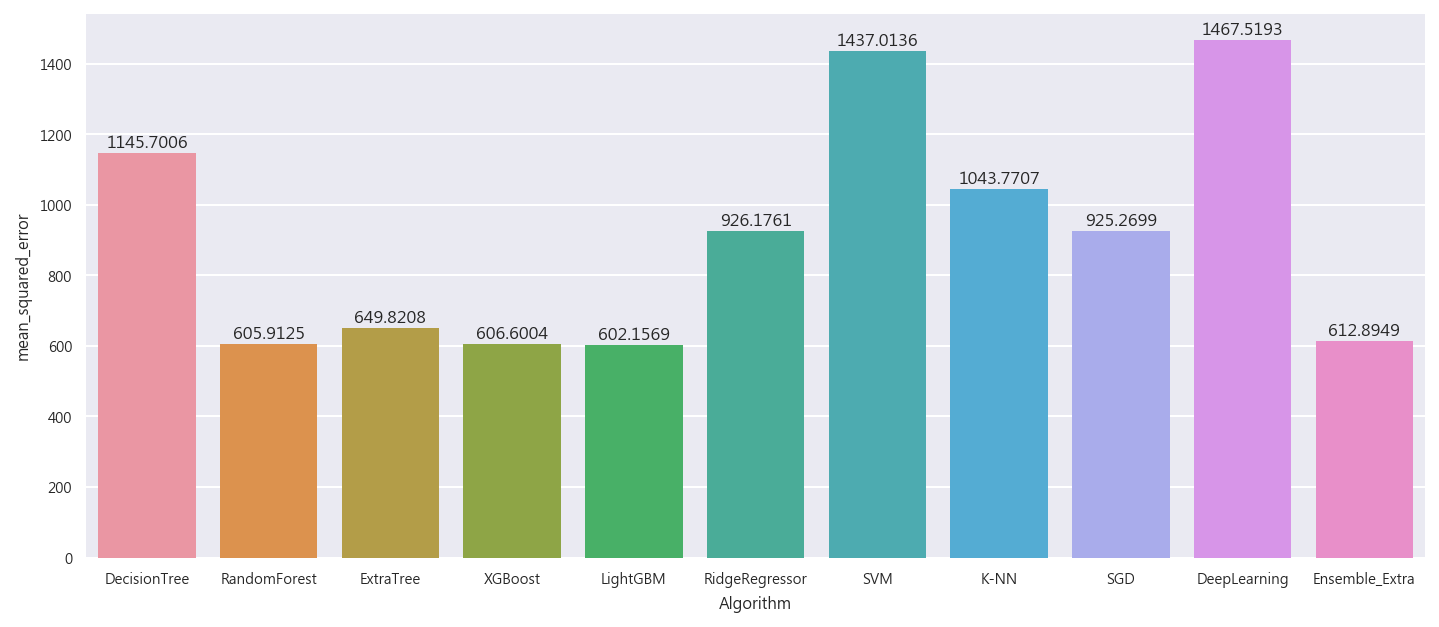

In [158]:
'模型簡單比較'
plt.rcParams['figure.figsize'] = (12,5)
print("各模型的訓練 MSE : ")
algobarplot = sns.barplot(x = 'Algorithm',y = 'mean_squared_error',data = TrainReport)
for p in algobarplot.patches: algobarplot.annotate(np.round(p.get_height(),decimals = 4), (p.get_x()+p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

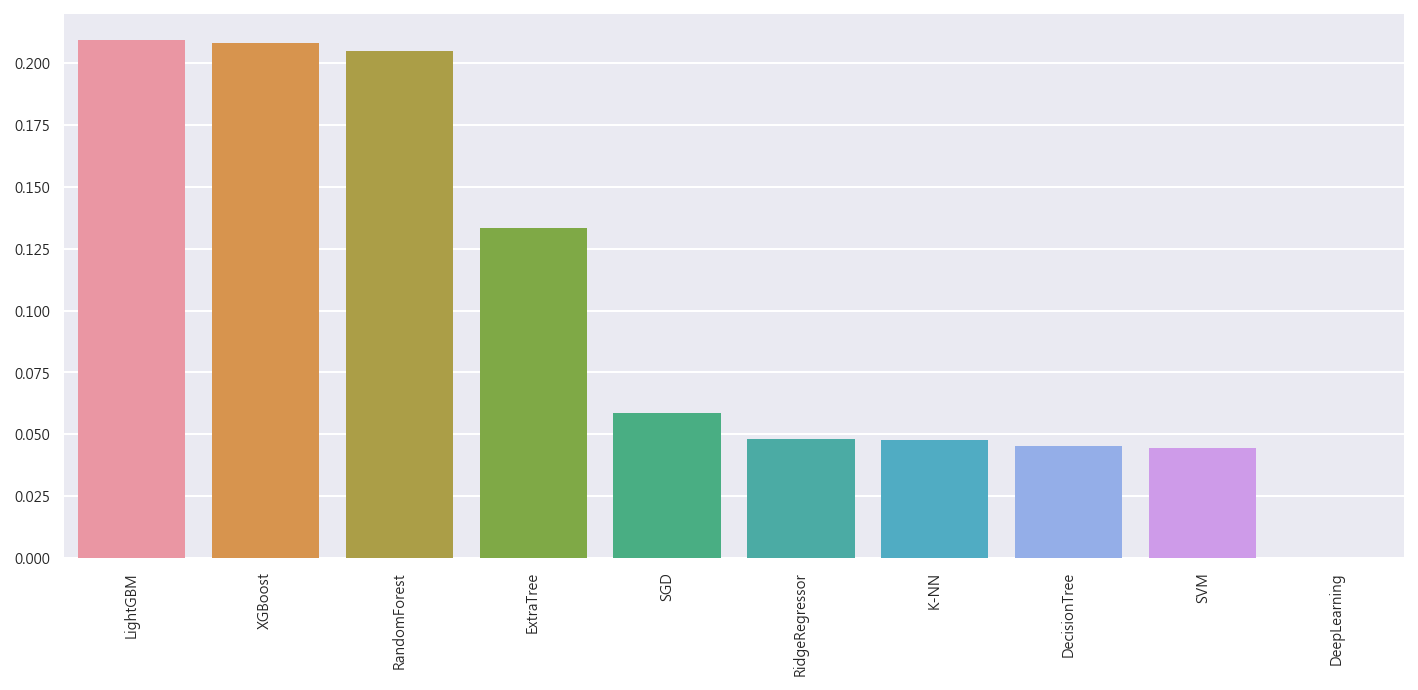

In [159]:
if hasattr(clf, 'feature_importances_'):
    col_size = len(TrainX_Ensemble.columns) if TrainX_Ensemble.columns.size < 20 else 20
    important_columns = [x for _,x in sorted(zip(clf.feature_importances_,TrainX_Ensemble.columns),reverse = True)]
    sns.set(font_scale = 0.7,font = "Microsoft JhengHei")
    barplot = sns.barplot(x = important_columns[:col_size], y = sorted(clf.feature_importances_,reverse = True)[:col_size],order = important_columns[:col_size])
    barplot.set_xticklabels(barplot.get_xticklabels(), rotation = 90);

如果 Test 資料有 Truth 值，以下呈現各模型在測試時，驗證的準確度比較圖

各模型的測試 MSE : 


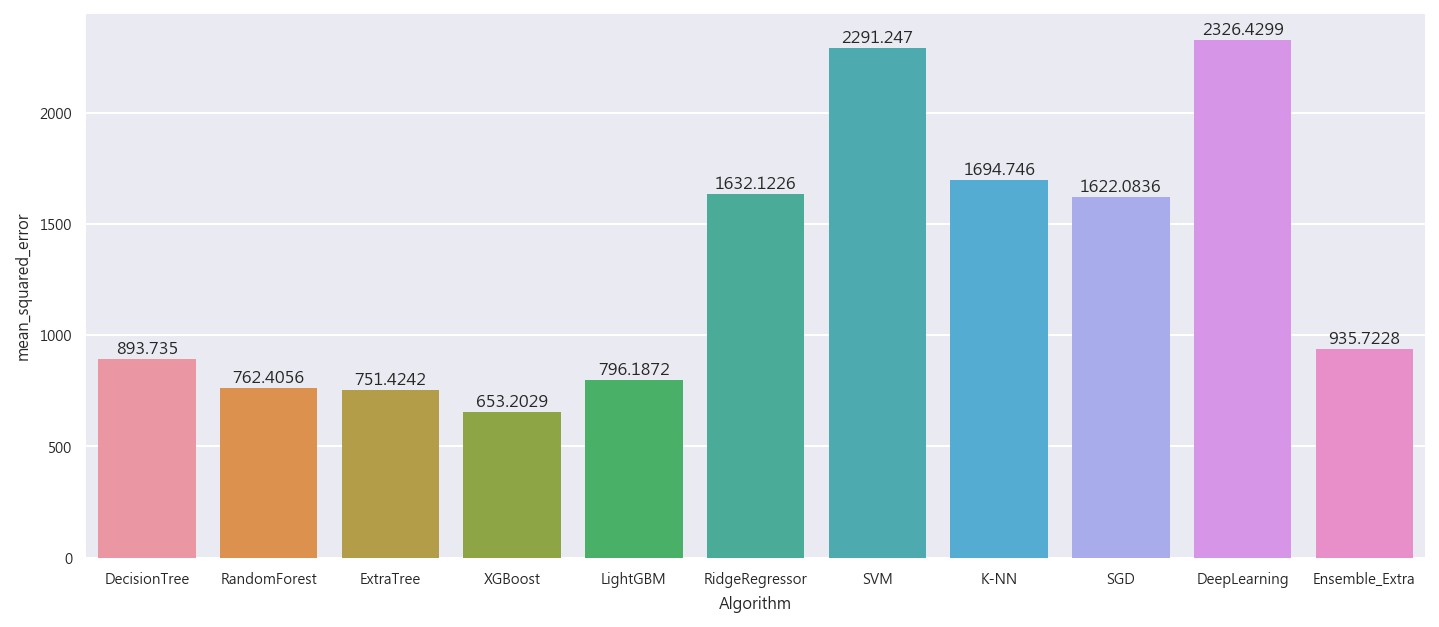

In [160]:
'模型簡單比較'
if TestY is not None:
    plt.rcParams['figure.figsize'] = (12,5)
    print("各模型的測試 MSE : ")
    algobarplot = sns.barplot(x = 'Algorithm',y = 'mean_squared_error',data = TestReport)
    for p in algobarplot.patches: algobarplot.annotate(np.round(p.get_height(),decimals = 4), (p.get_x()+p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [161]:
import warnings
warnings.filterwarnings("ignore",category = RuntimeWarning)
def magnify():
    return [dict(selector = "th",props = [("font-size", "11pt")]),
            dict(selector = "td",props = [('padding', ".4em .4em"),("font-size", "13pt"),('min-width', '105px')])]
TrainReport.reset_index(inplace = True,drop = True)
dropcol= ['mean_squared_error'] 
TrainReport.drop(dropcol,axis = 1).style.set_precision(5).set_table_styles(magnify()).background_gradient(cmap = 'viridis', low = .9, high = 0).highlight_null('Gainsboro')    

,Algorithm,mean_absolute_error,median_absolute_error,explained_variance_score,r2_score
0,DecisionTree,6.4266,0,0.19422,0.19417
1,RandomForest,5.1728,0.46,0.57387,0.57383
2,ExtraTree,5.1445,0.36,0.54304,0.54295
3,XGBoost,5.7953,0.85844,0.57335,0.57334
4,LightGBM,5.5792,0.69419,0.57647,0.57647
5,RidgeRegressor,9.5422,4.0029,0.34857,0.34857
6,SVM,6.6819,0.36972,0.016996,-0.01073
7,K-NN,7.4549,1.3065,0.26725,0.26586
8,SGD,9.5565,4.1736,0.34923,0.34921
9,DeepLearning,6.7647,3.752e-23,0,-0.032187


以下呈現預測結果的檔案，會包含各模型預測結果、各模型預測各個分類的機率或函數(Ridge)

In [162]:
#from os import startfile
#startfile(OutputAnswerCSV)
from IPython.display import FileLink, FileLinks
FileLink('./'+Output_test_Pred)#lists all downloadable files on server

/home/i9e00421/Output_test_Pred.csv

↑請點擊以上連結進行結果檔下載